In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
from itertools import chain
import glob
import seaborn as sns

In [19]:
df_merged = pd.read_excel('list_all_em_GTO.xlsx')

In [4]:
df_merged.head()

,Unnamed: 0,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
0,0,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",15,ШТ,CIF,3604.0,3017.0,73063.36
1,1,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",5,ШТ,CIF,1765.0,1465.0,37014.64
2,2,2011-01-17,8407343009,"ДВИГАТЕЛЬ ЗИЛ ,Б/У,БЕНЗИНОВЫЙ,ОБЪЕМ 6000СМ.КУБ...",АМО ЗИЛ,ЗИЛ,ЕКАТЕРИНБУРГ,"RU, RUS, Russia","UA, UKR, Ukraine",ООО ПЕТРУС,"Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1",ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА,"624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...",30,ШТ,CPT,14400.0,14400.0,27000.00
3,3,2011-01-17,8407343009,"ДВИГАТЕЛЬ ЗИЛ ,Б/У,НЕКОМПЛЕКТНЫЙ,БЕНЗИНОВЫЙ,ОБ...",АМО ЗИЛ,ЗИЛ,ЕКАТЕРИНБУРГ,"RU, RUS, Russia","UA, UKR, Ukraine",ООО ПЕТРУС,"Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1",ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА,"624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...",15,ШТ,CPT,3000.0,3000.0,6894.50
4,4,2011-01-20,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ В СБОРЕ С КОРОБКОЙ ПЕРЕДА...,MERCEDES - BENZ,MERCEDES - BENZ,ТОЯМА НЬЮ ПОРТ,"JP, JPN, Japan","JP, JPN, Japan","METAL AUTO HOKURIKU CO., LTD","ISHIKAWA KEN KOMATSU SHI SHIRAE MACHI, RO 62",ИП КОЧЕТКОВ ВЯЧЕСЛАВ ВИКТОРОВИЧ,"664019, , Г ИРКУТСК, ПЕР. МИНУСИНСКИЙ Д 10",38,ШТ,FOB,6460.0,6460.0,6536.45


In [23]:
df_merged.drop(columns=['Unnamed: 0'],inplace=True)

In [24]:
for col in list(df_merged.columns):
 (df_merged[col].dtype ==  'object') and (df_merged[col].fillna(value='unknown',inplace = True)) or (df_merged[col].fillna(value=0, inplace = True))

In [8]:
df_merged.isnull().sum()

Register Date          0
HS Code                0
Product Description    0
Producer               0
Brand                  0
Place of Receipt       0
Country of Origin      0
Country of Sales       0
Shipper                0
Shipper Address        0
Consignee              0
Consignee Address      0
Quantity               0
Unit of Measure        0
Incoterms              0
Gross Weight in KG     0
Net Weight in KG       0
Cargo Value USD        0
dtype: int64

In [21]:
def extract_engine_model (description, list_em):
    engine_model = []
    for e in list_em:
        em_reg1 = re.findall(r"(\b{}-\w+\b)".format(e), description)
        em_reg2 = re.findall(r"(\b{}-\w+-\w+\b)".format(e), description)
        if len(em_reg1) != 0 :
          em_reg1 = list(set(em_reg1)) 
          engine_model.append(em_reg1)
        if len(em_reg2) != 0 :
          em_reg2 = list(set(em_reg2))
          engine_model.append(em_reg2)
    
    return list(chain(*engine_model))

In [20]:
list_all_engine_model = []

In [38]:
list_toyota = pd.read_excel('em_toyota.xlsx')

In [46]:
list_all_engine_model_toyota = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota['List engine'].str.strip().tolist())
    if len(list_em) != 0:
      list_all_engine_model_toyota.append(list_em)
    
list_all_engine_model_toyota

[['2TR-FE', '2TR-FE-261'],
 ['2TR-FE', '2TR-FE-A343E'],
 ['1JZ-0649357'],
 ['5K-1298931', '2TR-0221092', '2UZ-9064542'],
 ['5K-1298931', '2TR-0221092', '2UZ-9064542'],
 ['5VZ-0970651', '5VZ-0799452'],
 ['1FZ-0331710', '5VZ-1157742', '5VZ-0818405'],
 ['3S-7968456'],
 ['1G-5897371'],
 ['3F-0309291'],
 ['1JZ-6119500', '1JZ-6116172', 'V-2491'],
 ['5S-0922401', '1ZZ-1052247', '1ZZ-0972897', '1G-6613201'],
 ['1NZ-B366087', '1NZ-A946272'],
 ['3S-7051240', '2TZ-1423316', '1JZ-1423316'],
 ['3S-1303230', '3S-6911045', '3S-7306959', '4S-1424182', '1NZ-2618515'],
 ['2JZ-0299325'],
 ['1MZ-0819394', '2UZ-0024244', '2UZ-0012648', '2UZ-0076639', '2UZ-0620456'],
 ['5A-G855525', '3S-7526819', '4S-1329002', '4E-2277208', '5E-1403456'],
 ['3S-9278941'],
 ['5VZ-1213852', '2UZ-0005297', '2UZ-9003553'],
 ['1ZZ-0399079', '2NZ-2404695', '1MZ-0762158'],
 ['3S-9192911'],
 ['1NZ-B000831', '1JZ-0523462', '1MZ-0792353'],
 ['1NZ-A372882', '1AZ-4016158'],
 ['2SZ-1465429', '2JZ-0965689'],
 ['3S-6669363', '1G-6365381']

In [47]:
len(list_all_engine_model_toyota)

25699

In [48]:
all_engine_model_toyota = list(chain(*list_all_engine_model_toyota))
len(all_engine_model_toyota)

93048

In [42]:
df_list_engine_toyota = df_merged['Product Description'].map(lambda x : extract_engine_model(x,list_toyota['List engine'].str.strip().tolist()))

In [43]:
df_list_engine_toyota

0           [2TR-FE, 2TR-FE-261]
1         [2TR-FE, 2TR-FE-A343E]
2                             []
3                             []
4                             []
                   ...          
259191                        []
259192                        []
259193                        []
259194                        []
259195                        []
Name: Product Description, Length: 259196, dtype: object

In [16]:
list_honda = pd.read_excel('em_honda.xlsx')

In [17]:
list_honda.drop_duplicates()

,Engine_Famlily
0,E07A
1,ECA1
2,E05A
4,E07Z
5,S07A
...,...
276,RA271E
277,RA272E
278,RA273E
281,RA121E


In [19]:
list_all_engine_model_honda = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda['Engine_Famlily'].str.strip().tolist())
    list_all_engine_model_honda.append(list_em)
    
list_all_engine_model_honda

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 ['J30A-6000582'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['K20A-2080249'],
 [],
 [],
 [],
 [],
 ['B20B-1161655'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['B20B-1023753', 'L13A-1001826'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['L13A-1602007'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['J30A-3004572'],
 ['K24A-2508078'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 

In [21]:
list_mazda = pd.read_excel('em_mazda.xlsx')

In [22]:
list_all_engine_model_mazda = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda['List engine'].str.strip().tolist())
    list_all_engine_model_mazda.append(list_em)
    
list_all_engine_model_mazda

[['FE-261'],
 ['FE-A343E', 'FE-A343E-111'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['L3-203494'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['FE-943620', 'KL-701503'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['L3-239057'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['G5-206157'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['FP-776614'],
 ['FP-701420', 'ZL-306871'],
 [],
 [],
 [],
 [],
 [],
 ['ZJ-261764'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['FP-766535'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [

In [23]:
len(list_all_engine_model_mazda)

259196

In [3]:
df_list_engine = pd.read_excel('C:\\Users\\Admin\\Github\\Kaiho\\Engine Model _1025.xlsx')
df_list_engine.head()

,Unnamed: 0,メーカー,燃料,買付受付,型式,駆動1,駆動2,駆動3,詳細,車輌型式,KRA売単価,車名,仕入値,EG売価\n（マニ触付）\nW,EG売価\n（マニ触抜/無）\nWO
0,2.0,FIAT,0,×,4,FR,AT,2WD,NaN,NaN,NaN,NaN,NaN,売価確認,売価確認
1,3.0,PORCHE,NaN,×,64,RR,AT,4WD,NaN,NaN,NaN,NaN,NaN,売価確認,0
2,4.0,PORCHE,NaN,×,66,RR,MT,2WD,NaN,NaN,NaN,NaN,NaN,売価確認,0
3,5.0,PORCHE,NaN,×,70,RR,AT,4WD,NaN,NaN,NaN,NaN,NaN,売価確認,0
4,6.0,BENZ,NaN,○,102,FR,AT,2WD,NaN,NaN,NaN,NaN,NaN,40000,0


In [25]:
df_count_brand_toyota =  df_list_engine[df_list_engine['メーカー']  == 'TOYOTA']

In [26]:
list_toyota = list(df_count_brand_toyota['型式'].unique())

In [28]:
list_all_engine_model_toyota_kaiho = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
      list_all_engine_model_toyota_kaiho.append(list_em)
    
list_all_engine_model_toyota_kaiho

[['2TR-FE-261'],
 ['2TR-FE-A343E', '2TR-FE-A343E-111'],
 ['5K-1298931'],
 ['5K-1298931'],
 ['3F-0309291'],
 ['3Y-1087320'],
 ['1ZZ-FE-1075334'],
 ['1N-0164680'],
 ['2L-4744731'],
 ['7K-0535452'],
 ['3Y-1131701'],
 ['7K-0305900'],
 ['3Y-0960114'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['7K-0384461'],
 ['3Y-1087320'],
 ['1RZ-2972261'],
 ['3Y-2025152'],
 ['13B-472259'],
 ['T2-007921'],
 ['B-3130483'],
 ['7K-0441751'],
 ['3Y-1104798', '3Y-0852568', '7K-0'],
 ['3F-0342176'],
 ['7K-НОМЕР'],
 ['T2-702740'],
 ['1RZ-3074053'],
 ['7K-074', '7K-0317006'],
 ['7K-0388811'],
 ['2Y-0878492'],
 ['3Y-0982805'],
 ['3Y-0809881'],
 ['2Y-0733933'],
 ['3F-0330119'],
 ['3Y-2006752'],
 ['3Y-0908831'],
 ['3Y-1188703'],
 ['T2-008564'],
 ['3Y-1092534'],
 ['7K-0699656'],
 ['2Y-0877867'],
 ['3Y-1048986'],
 ['3Y-1193297'],
 ['7K-0262939'],
 ['T2-702411'],
 ['7K-0217074'],
 ['7K-0484243'],
 ['3Y-1255955'],
 ['1RZ-3053319'],
 ['7K-0530481'],
 ['T2-702775'],
 ['3F-0296216'],
 ['2Y-0858389'],
 ['

In [29]:
len(list_all_engine_model_toyota_kaiho)

966

In [35]:
df_merged.columns

Index(['Register Date', 'HS Code', 'Product Description', 'Producer', 'Brand',
       'Place of Receipt', 'Country of Origin', 'Country of Sales', 'Shipper ',
       'Shipper Address', 'Consignee', 'Consignee Address', 'Quantity',
       'Unit of Measure', 'Incoterms', 'Gross Weight in KG',
       'Net Weight in KG', 'Cargo Value USD'],
      dtype='object')

In [36]:
df_merged

array(['TOYOTA TSUSHO CORPORATION', 'ООО ПЕТРУС ',
       'METAL AUTO HOKURIKU CO., LTD', ...,
       'UAB AFTALITANA (BY ORDER RIJAS GMBH AND CO. KG)',
       'FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO INDUSTRY CO. LTD',
       'POPLA CO.LTD'], dtype=object)

In [44]:
all_engine_model_toyota_kaiho  = list(chain(*list_all_engine_model_toyota_kaiho))

In [45]:
len(all_engine_model_toyota_kaiho)

1188

In [52]:
df_merged['shipper_extract']  = df_merged['Shipper '].map(lambda x : 'KAIHO' if 'KAIHO' in x else ('Others' if x  else 'None'))

In [70]:
df_merged['country_extract']  = df_merged['Country of Sales'].map(lambda x : 'Japan' if ('japan' in x.lower() or 'jp' in x.lower() or 'jpn' in x.lower()) else ('Others' if x  else 'None'))

In [71]:
df_kaiho_extract = df_merged[(df_merged['shipper_extract'] == 'KAIHO') & (df_merged['country_extract'] == 'Japan')]

In [72]:
df_kaiho_extract

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD,shipper_extract,country_extract
27,2011-01-12,8407343009,"БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...","DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...","DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","KAIHO SANGYO CO., LTD",920-0209 ISHIKAWA-KEN KANAZAWA-SHI HIGASHI-KAG...,ВИНАКО ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ,"690078, ПРИМОРСКИЙ КРАЙ, ВЛАДИВОСТОК, ПУШКИНСК...",24,ШТ,CFR,5010.0,5010.0,3263.98,KAIHO,Japan
37,2011-01-12,8407343009,"ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...","TOYOTA, NISSAN","TOYOTA, NISSAN",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","KAIHO SANGYO CO., LTD",920-0209 ISHIKAWA KANAZAWA-SHI 1-25 HIGASHIKAG...,ХМЕЛЕВ ЕВГЕНИЙ АЛЕКСАНДРОВИЧ ИП,"690018, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. В...",3,ШТ,CFR,750.0,750.0,1570.00,KAIHO,Japan
47,2011-01-13,8407343009,"ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...",MITSUBISHI,MITSUBISHI,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","KAIHO SANGYO CO., LTD",920-0209 ISHIKAWA KANAZAWA-SHI 1-25 HIGASHIKAG...,ХМЕЛЕВ ЕВГЕНИЙ АЛЕКСАНДРОВИЧ ИП,"690018, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. В...",1,ШТ,CFR,300.0,300.0,450.00,KAIHO,Japan
68,2011-01-17,8407343009,"ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","KAIHO SANGYO CO.,LTD.",920-0209 ISHIKAWA KANAZAWA-SHI HIGASHIKAGATSUM...,ООО АЗИЯ,"690105, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. Р...",7,ШТ,CFR,955.0,955.0,741.25,KAIHO,Japan
69,2011-01-17,8407343009,"ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","KAIHO SANGYO CO.,LTD.",920-0209 ISHIKAWA KANAZAWA-SHI HIGASHIKAGATSUM...,ООО АЗИЯ,"690105, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. Р...",22,ШТ,CFR,2955.0,2955.0,2293.62,KAIHO,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258986,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...,FORD,FORD,TOYAMASHINKO,"JP, JPN, Japan","JP, JPN, Japan",FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...,"920-0209, ISHIKAWA KEN, KANAZAWA-SHI, 1-25 HIG...",ООО АВТОСТОК,"630088, ГОРОД НОВОСИБИРСК, СЕВЕРНЫЙ ПРОЕЗД, Д ...",0,unknown,FOB,1165.0,1135.0,1714.19,KAIHO,Japan
258987,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...,NISSAN,NISSAN,TOYAMASHINKO,"JP, JPN, Japan","JP, JPN, Japan",FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...,"920-0209, ISHIKAWA KEN, KANAZAWA-SHI, 1-25 HIG...",ООО АВТОСТОК,"630088, ГОРОД НОВОСИБИРСК, СЕВЕРНЫЙ ПРОЕЗД, Д ...",0,unknown,FOB,1571.0,1530.0,2310.22,KAIHO,Japan
258988,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...,MITSUBISHI SUBARU SUZUKI,MITSUBISHI SUBARU SUZUKI,TOYAMASHINKO,"JP, JPN, Japan","JP, JPN, Japan",FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...,"920-0209, ISHIKAWA KEN, KANAZAWA-SHI, 1-25 HIG...",ООО АВТОСТОК,"630088, ГОРОД НОВОСИБИРСК, СЕВЕРНЫЙ ПРОЕЗД, Д ...",0,unknown,FOB,2125.0,2070.0,3133.66,KAIHO,Japan
258989,2019-12-01,8407343009,ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...,TOYOTA,TOYOTA,TOYAMASHINKO,"JP, JPN, Japan","JP, JPN, Japan",FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...,"920-0209, ISHIKAWA KEN, KANAZAWA-SHI, 1-25 HIG...",ООО АВТОСТОК,"630088, ГОРОД НОВОСИБИРСК, СЕВЕРНЫЙ ПРОЕЗД, Д ...",0,unknown,FOB,3584.0,3500.0,5287.45,KAIHO,Japan


In [56]:
list_all_engine_model_toyota_kaiho_extract = []

for des in df_kaiho_extract['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
      list_all_engine_model_toyota_kaiho_extract.append(list_em)
    
list_all_engine_model_toyota_kaiho_extract

[]

In [60]:
a = df_kaiho_extract['Producer'].apply(lambda x : 'TOYOTA' in x).sum()

In [73]:
list_engine_GTO  = pd.read_csv('C:\\Users\\Admin\\Github\\Kaiho\\GTO_JAPAN_engine.csv')

D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
list_engine_GTO

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,...,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD,nor_jp_country,group_hs_code,year,nor_shipper,merge_brand
0,2018-01-01,8407343009,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,SUZUKI,SUZUKI,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",EARLYBIRD CO.LTD,"JAPAN, TOYAMA-SHI, IWASE, SUWAMACHI 52",...,NaN,CFR,200.0,200.0,302.00,Japan,840734,2018,Other,SUZUKI
1,2018-01-01,8407349908,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,MAZDA MOTOR CORPORATION,MAZDA,ПОХАНГ,"JP, JPN, Japan","JP, JPN, Japan",PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...,", SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...",...,NaN,FOB,107979.8,66410.0,539455.71,Japan,840734,2018,Other,MAZDA
2,2018-01-01,8407343009,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,"DAIHATSU,SUBARU,SUZUKI","DAIHATSU,SUBARU,SUZUKI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","ASTRADE CO.,LTD",", , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU",...,NaN,CFR,800.0,800.0,1200.00,Japan,840734,2018,Other,"DAIHATSU,SUBARU,SUZUKI"
3,2018-01-01,8407343009,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,TOYOTA MOTOR CORP.,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",YAMAGIN CORPORATION,", JAPAN, TOKYO, DAIICHI SEIMEI BLDG,8F,2-19-3 ...",...,NaN,CFR,399.0,399.0,602.49,Japan,840734,2018,Other,TOYOTA
4,2018-01-01,8407343009,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","ARAI CO., LTD","671-1132, HYOGO, HIMEJI CITY, KANBEI CHO OHTSU...",...,NaN,CFR,2540.0,2540.0,3835.40,Japan,840734,2018,Other,TOYOTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100539,2016-12-01,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...,HONDA MOTOR CO. LTD,HONDA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",SHIJO TRADING,SHIZUOKA 418-0022 2150-2 KOIZUMI FUJINOMIYA,...,NaN,CFR,1897.8,1897.8,2846.70,Japan,840734,2016,Other,HONDA
100540,2016-12-01,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...,HONDA MOTOR CORPORATION,HONDA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan","EAST-JAPAN RECYCLING RESOURCES CO.,LTD 21-1 SH...",NaN,...,NaN,CFR,900.0,900.0,1360.41,Japan,840734,2016,Other,HONDA
100541,2016-12-01,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...,SUBARU-FUJI HEAVY INDUSTRIES LTD,SUBARU,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",SCP-TRANS LLC,KOBE 658-0032 5 KOYOCHO HIGASHI-NADA-KU RIC WE...,...,NaN,CFR,720.0,714.0,1071.00,Japan,840734,2016,Other,SUBARU
100542,2016-12-01,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...,HONDA MOTOR CO.,HONDA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan","KAIHO SANGYO CO.,LTD","KANAZAWA-SHI ISHIKAWA,920-0209 1-25 HIGASHIKAG...",...,NaN,CFR,900.0,900.0,1350.30,Japan,840734,2016,KAIHO,HONDA


In [79]:
list_all_engine_model_toyota_kaiho_extract = []

for des in list_engine_GTO['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
      list_all_engine_model_toyota_kaiho_extract.append(list_em)
    
list_all_engine_model_toyota_kaiho_extract

[]

In [18]:
df_list_engine = pd.read_excel('C:\\Users\\Admin\\Github\\Kaiho\\Engine Model _1025.xlsx')
df_list_engine.head()

,Unnamed: 0,メーカー,燃料,買付受付,型式,駆動1,駆動2,駆動3,詳細,車輌型式,KRA売単価,車名,仕入値,EG売価\n（マニ触付）\nW,EG売価\n（マニ触抜/無）\nWO
0,2.0,FIAT,0,×,4,FR,AT,2WD,NaN,NaN,NaN,NaN,NaN,売価確認,売価確認
1,3.0,PORCHE,NaN,×,64,RR,AT,4WD,NaN,NaN,NaN,NaN,NaN,売価確認,0
2,4.0,PORCHE,NaN,×,66,RR,MT,2WD,NaN,NaN,NaN,NaN,NaN,売価確認,0
3,5.0,PORCHE,NaN,×,70,RR,AT,4WD,NaN,NaN,NaN,NaN,NaN,売価確認,0
4,6.0,BENZ,NaN,○,102,FR,AT,2WD,NaN,NaN,NaN,NaN,NaN,40000,0


In [10]:
df_brand_toyota =  df_list_engine[df_list_engine['メーカー']  == 'TOYOTA']
list_toyota = list(df_brand_toyota['型式'].unique())

In [11]:
df_brand_mazda =  df_list_engine[df_list_engine['メーカー']  == 'MAZDA']
list_mazda = list(df_brand_mazda['型式'].unique())

In [173]:
df_brand_mitsubishi =  df_list_engine[df_list_engine['メーカー']  == 'MITSUBISHI']
list_mitsubishi = list(df_brand_mitsubishi['型式'].unique())

In [32]:
df_brand_honda =  df_list_engine[df_list_engine['メーカー']  == 'HONDA']
list_honda = list(df_brand_honda['型式'].unique())

In [33]:
df_brand_nissan =  df_list_engine[df_list_engine['メーカー']  == 'NISSAN']
list_nissan = list(df_brand_nissan['型式'].unique())

In [34]:
df_brand_subaru =  df_list_engine[df_list_engine['メーカー']  == 'SUBARU']
list_subaru = list(df_brand_subaru['型式'].unique())

In [174]:
len(list_mitsubishi)

66

In [25]:
list_all_engine_model_toyota_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO.append(list_em)
    
list_all_engine_model_toyota_GTO

[['2TR-FE-261'],
 ['2TR-FE-A343E', '2TR-FE-A343E-111'],
 ['5K-1298931'],
 ['5K-1298931'],
 ['3F-0309291'],
 ['3Y-1087320'],
 ['1ZZ-FE-1075334'],
 ['1N-0164680'],
 ['2L-4744731'],
 ['7K-0535452'],
 ['3Y-1131701'],
 ['7K-0305900'],
 ['3Y-0960114'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['7K-0384461'],
 ['3Y-1087320'],
 ['1RZ-2972261'],
 ['3Y-2025152'],
 ['13B-472259'],
 ['T2-007921'],
 ['B-3130483'],
 ['7K-0441751'],
 ['3Y-1104798', '3Y-0852568', '7K-0'],
 ['3F-0342176'],
 ['7K-НОМЕР'],
 ['T2-702740'],
 ['1RZ-3074053'],
 ['7K-0317006', '7K-074'],
 ['7K-0388811'],
 ['2Y-0878492'],
 ['3Y-0982805'],
 ['3Y-0809881'],
 ['2Y-0733933'],
 ['3F-0330119'],
 ['3Y-2006752'],
 ['3Y-0908831'],
 ['3Y-1188703'],
 ['T2-008564'],
 ['3Y-1092534'],
 ['7K-0699656'],
 ['2Y-0877867'],
 ['3Y-1048986'],
 ['3Y-1193297'],
 ['7K-0262939'],
 ['T2-702411'],
 ['7K-0217074'],
 ['7K-0484243'],
 ['3Y-1255955'],
 ['1RZ-3053319'],
 ['7K-0530481'],
 ['T2-702775'],
 ['3F-0296216'],
 ['2Y-0858389'],
 ['

In [26]:
len(list_all_engine_model_toyota_GTO)

966

In [28]:
list_all_engine_model_mazda_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_mazda_GTO.append(list_em)
    
list_all_engine_model_mazda_GTO

[['FE-261'],
 ['FE-A343E', 'FE-A343E-111'],
 ['FE-943620'],
 ['G5-206157'],
 ['F8-363344'],
 ['FE-1075334'],
 ['YF-210212'],
 ['B5-217046'],
 ['F8-999542'],
 ['F8-362129'],
 ['F8-258832'],
 ['FE-4479404'],
 ['FE-4479404'],
 ['FE-4479404'],
 ['GY-320358'],
 ['FE-970151'],
 ['F8-255572'],
 ['F8-269004'],
 ['G5-209150'],
 ['F8-228199', 'F8-316878'],
 ['F8-59019', 'FE-31034'],
 ['F8-260588'],
 ['F8-281007'],
 ['B5-236648'],
 ['B6-448404'],
 ['F8-571742'],
 ['G6-080010'],
 ['B6-273607'],
 ['F8-368036'],
 ['G6-188815'],
 ['F8-237927'],
 ['GY-221473'],
 ['GY-222882'],
 ['F8-250596', 'F8-582823'],
 ['B5-219484'],
 ['13B-472259'],
 ['F8-368036'],
 ['GY-269884', 'GY-405355'],
 ['FE-986908'],
 ['E5-732530', 'F8-512289'],
 ['B5-219125', 'J5-144188'],
 ['FE-450181'],
 ['FE-980888'],
 ['YF-210894'],
 ['F8-585676', 'R2-868441'],
 ['GY-252489', 'GY-282628'],
 ['B5-522120', 'B5-521658', 'GY-280607'],
 ['F8-279859'],
 ['YF-21525'],
 ['B5-366020',
  'F8-525880',
  'F8-260857',
  'F8-574587',
  'F8-577743

In [29]:
len(list_all_engine_model_mazda_GTO)

2069

In [35]:
list_all_engine_model_mitsubishi_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_mitsubishi_GTO.append(list_em)
    
list_all_engine_model_mitsubishi_GTO

[['4G93-JB1495'],
 ['6G73-G85025', '6G73-RH9264'],
 ['4G93-QC6102'],
 ['4G93-KN0232'],
 ['4G93-KL5721'],
 ['4G15-AD0839'],
 ['6G74-CP5608'],
 ['6G74-CY0151'],
 ['4G63-XR3743'],
 ['6G74-CY2183', '6G74-HD5005'],
 ['4G15-YR5535', '6G74-JO9326'],
 ['4G63-BP3922', '4G64-AL5107', '4G93-GR2937', '6A12-BH7706', '6G73-KS5873'],
 ['6G73-G50108'],
 ['4G93-ML7161'],
 ['4G93-MM5009'],
 ['6G74-RP9301'],
 ['4G64-YD7787L', '4G93-PC5175'],
 ['6G74-CA0650'],
 ['4G93-GQ8731'],
 ['4G93-MT8119'],
 ['4G69-LS0465',
  '6A13-BG2644',
  '6G72-BX0253',
  '6G72-T67319',
  '6G74-T50316',
  '6G74-BL4166'],
 ['6G72-H46190', '6G74-CJ1184'],
 ['6G74-HM6242'],
 ['6G74-GY6717'],
 ['4G63-TS0340', '4G64-XD3878'],
 ['4G13-QT1162', '4G15-XR2101', '6A13-BC4369', '6A13-CC0408'],
 ['4G69-L', '4G69-L-H5'],
 ['4G63-L', '4G63-L-H8'],
 ['6G74-DC6704'],
 ['6G72-R14262'],
 ['6G72-K55163', '6G72-AH9993'],
 ['4G63-TE08'],
 ['4G63-SK0281', '4G63-UA4807'],
 ['6G72-TG7879'],
 ['4G15-TP5036', '4G67-LR7768'],
 ['6G73-L49808',
  '6G74-TX480

In [36]:
len(list_all_engine_model_mitsubishi_GTO)

7262

In [38]:
list_all_engine_model_honda_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_honda_GTO.append(list_em)
    
list_all_engine_model_honda_GTO

[['J30A-6000582'],
 ['F23A-2416885'],
 ['K20A-2080249'],
 ['B20B-1161655', 'ZC-6212744'],
 ['B20B-1023753', 'G20A-2005286', 'L13A-1001826'],
 ['L13A-1602007'],
 ['J30A-3004572'],
 ['K24A-2508078'],
 ['C32A-2050916',
  'K20A-6005371',
  'K20A-6012831',
  'L15A-1309831',
  'L15A-1154134',
  'L15A-1100687'],
 ['B20B-3448376'],
 ['D16A-8007284', 'F23A-1203845'],
 ['D15B-800047'],
 ['D16A-9003388', 'F20B-2053760', 'F23A-1004524'],
 ['G20A-1562290'],
 ['D13B-6205175',
  'F18B-2002167',
  'F20B-2704211',
  'F20B-2054948',
  'G25A-2012486',
  'L15A-3135099'],
 ['B20B-1152191'],
 ['F23A-2222976'],
 ['D16A-1706362', 'F23A-2231649'],
 ['F20B-2744821', 'F20B-2060623', 'F20B-2709284', 'K20A-2054363'],
 ['B20B-1001104',
  'D16A-8006285',
  'K20A-2012324',
  'L13A-1103797',
  'L15A-4006250'],
 ['B20B-9206163',
  'D15B-9006471',
  'F20B-2013288',
  'K24A-8000564',
  'ZC-6509616'],
 ['B20B-1102146', 'D13B-6305733'],
 ['K20A-2521945'],
 ['B20B-1014875',
  'D16A-1713866',
  'F20B-2709112',
  'F20B-201124

In [329]:
pd.Series(list(chain(*list_all_engine_model_honda_GTO))).to_excel('test.xlsx')

In [40]:
list_all_engine_model_nissan_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_nissan_GTO.append(list_em)
    
list_all_engine_model_nissan_GTO

[['RB20-253129B'],
 ['Z16-725689X'],
 ['TD27-066556T'],
 ['RB20-195991B9'],
 ['Z16-25366'],
 ['Z16-704420X'],
 ['NA16-70'],
 ['RB20-156199B'],
 ['RB20-254530B'],
 ['RB20-130563B'],
 ['A15-376848A'],
 ['RB20-267001B'],
 ['RB20-215648B'],
 ['NA20-003150W'],
 ['SR20DET-535083A'],
 ['RB20-8630567'],
 ['RB20-090620B'],
 ['NA16-707715X', 'RB20-136033B'],
 ['NA20-833933'],
 ['RB20-956110A'],
 ['RB20-972604A'],
 ['D5-098090'],
 ['RB20-118135B'],
 ['RB20-752453'],
 ['TD27-076491A'],
 ['RB20-206552B', 'RB20-030290B'],
 ['TD27-076491A'],
 ['RB20-048617A'],
 ['RB20-25712'],
 ['RB20-173595B'],
 ['RB20-244526B'],
 ['Z16-298877'],
 ['RB20-109482B'],
 ['RB20-871653A'],
 ['NA20-907268X'],
 ['RB20-003793B'],
 ['RB20-144982B'],
 ['A15-409264A',
  'RB20-185773B',
  'RB20-218293B',
  'RB20-258526B',
  'RB20-669979A'],
 ['NA20-853886'],
 ['RB20-709488X'],
 ['RB20-226582B'],
 ['RB20-233621B', 'RB20-223556B'],
 ['NA20-763699X'],
 ['RB20-212166B', 'RB20-863056A'],
 ['RB20-269031B'],
 ['Z20-605136'],
 ['PF-8813

In [41]:
len(list_all_engine_model_nissan_GTO)

1115

In [42]:
list_all_engine_model_subaru_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_subaru_GTO.append(list_em)
    
list_all_engine_model_subaru_GTO

[['EJ20-660933', 'EJ20-B490533'],
 ['EJ25-701920'],
 ['EJ20-A893668'],
 ['EJ20-612187'],
 ['EJ20-740260'],
 ['EJ20-974764'],
 ['EJ25-B03464'],
 ['EJ20-A888010', 'EJ20-B13916'],
 ['EJ15-155212', 'EJ20-79428', 'EJ20-B006386', 'EJ25-A819597'],
 ['EJ20-A955836'],
 ['EJ20-687452'],
 ['EJ25-034578'],
 ['EJ25-630173'],
 ['EL15-C961912'],
 ['EJ18-201500'],
 ['EJ20-B947799'],
 ['EJ20-B906541'],
 ['EJ20-561972', 'EJ20-724904', 'EJ20-B235179'],
 ['EJ20-209586'],
 ['EJ18-719996', 'EJ20-719960', 'EJ20-327893', 'EJ20-921387'],
 ['EJ20-B464790'],
 ['EJ20-B135886'],
 ['EJ20-B624055'],
 ['EJ20-C191787',
  'EJ20-B548102',
  'EJ20-B565136',
  'EJ20-B181420',
  'EJ20-B091827'],
 ['EJ20-B329901'],
 ['EJ25-D579128', 'EJ25-D998634'],
 ['EJ20-B264599', 'EJ20-A656603'],
 ['EJ20-630655'],
 ['EJ20-B551637'],
 ['EJ20-862172'],
 ['EJ15-C591109', 'EJ20-C167498', 'EJ25-620615'],
 ['EJ20-B891486', 'EJ20-B057765'],
 ['EJ20-829201', 'EJ25-B207921', 'EJ25-B004074'],
 ['EJ20-C394405', 'EJ20-C605887', 'EJ20-B962504'],
 ['

In [43]:
len(list_all_engine_model_subaru_GTO)

5684

# Filter producer contain TOYOTA

In [54]:
df_toyota = df_merged[df_merged.Producer.str.contains('TOYOTA')]
df_toyota

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
0,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",15,ШТ,CIF,3604.0,3017.0,73063.36
1,2011-01-29,8407349908,СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...,TOYOTA TSUSHO CORPORATION,ОТСУТСТВУЕТ,КОТКА,"JP, JPN, Japan","JP, JPN, Japan",TOYOTA TSUSHO CORPORATION,"450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME",ООО ТЕХНОСЕРВИСПРОМ,"603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...",5,ШТ,CIF,1765.0,1465.0,37014.64
6,2011-01-06,8407343009,"ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,1JZ-0...",TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","МИХАИЛ КАМПАНИ КО.,ЛТД","910-0049 ФУКУИ-КЕН ФУКУИ-ШИ ФУКАДАНИ-ЧО, 1-7-3",НИКА ВЭД ООО,"690002, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, НЕКРАС...",1,ШТ,CFR,150.0,150.0,120.00
8,2011-01-13,8407343009,"ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...","TOYOTA,MITSUBISHI,NISSAN","TOYOTA,MITSUBISHI,NISSAN",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","ЖАПРОС КО., ЛТД","950-3102 ДЖАПАН МАЙДЗУРУ НИИГАТА КЕН,НИГАШИКОУ...",ИП КИМ ВАСИЛИЙ АФАНАСЬЕВИЧ,"692840, ПРИМОРСКИЙ КРАЙ, С.НОВОНЕЖИНО, УЛ.БОЛЬ...",19,ШТ,CFR,3950.0,3950.0,2765.00
9,2011-01-13,8407343009,"ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АКП ЯПОНСКО...","TOYOTA,MITSUBISHI,SUZUKI","TOYOTA,MITSUBISHI,SUZUKI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","ЖАПРОС КО., ЛТД","950-3102 ДЖАПАН ТОЯМА НИИГАТА КЕН,НИГАШИКОУ,СЕ...",ИП КИМ ВАСИЛИЙ АФАНАСЬЕВИЧ,"692840, ПРИМОРСКИЙ КРАЙ, ШКОТОВСКИЙ Р-ОН П.НОВ...",12,ШТ,CFR,3000.0,3000.0,2400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259166,2019-12-01,8407343009,ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...,TOYOTA MOTOR CO.,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",PIONEER COMPANY LTD.,"OSAKA, HIGASHI-OSAKA-CITY, 5-1-20",ООО АМБА ТРЕЙД,"690105, ГОРОД ВЛАДИВОСТОК, УЛ БОРОДИНСКАЯ, Д 2...",0,unknown,CFR,250.0,250.0,377.50
259167,2019-12-01,8407343009,ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...,TOYOTA MOTOR CO.,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",PIONEER COMPANY LTD.,"OSAKA, HIGASHI-OSAKA-CITY, 5-1-20",ООО АМБА ТРЕЙД,"690105, ГОРОД ВЛАДИВОСТОК, УЛ БОРОДИНСКАЯ, Д 2...",0,unknown,CFR,190.0,190.0,286.90
259176,2019-12-01,8407343009,"ДВИГАТЕЛЬ ОТ А/М Б/У В СБОРЕ С АКП ,БЕНЗИНОВЫЙ...",TOYOTA MOTOR CO. LTD.,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",UNICO CO LTD,"ЯПОНИЯ, ЙОКОГАМА, АСОНА, БИЗИН 926-3",ИП МАТВЕЕВ СТАНИСЛАВ ВАЛЕРЬЕВИЧ,"630000, ГОРОД НОВОСИБИРСК",0,unknown,CFR,9651.0,9651.0,14575.00
259180,2019-12-01,8407343009,ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...,TOYOTA MOTOR CORP,TOYOTA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",EK3 CO. LTD,"933-0209, TOYAMA PREF, IMIZU SHI, SURIDEIJI 82-1",ООО ДАЛЬКОР,"680006, ГОРОД ХАБАРОВСК, УЛ ИНДУСТРИАЛЬНАЯ, Д 1Б",0,unknown,CIF,4010.0,4010.0,3142.19


In [55]:
list_all_engine_model_toyota_GTO_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_filter

[['2TR-FE-261'],
 ['2TR-FE-A343E', '2TR-FE-A343E-111'],
 ['5K-1298931'],
 ['5K-1298931'],
 ['3F-0309291'],
 ['3Y-1087320'],
 ['1ZZ-FE-1075334'],
 ['1N-0164680'],
 ['2L-4744731'],
 ['7K-0535452'],
 ['3Y-1131701'],
 ['7K-0305900'],
 ['3Y-0960114'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['7K-0384461'],
 ['3Y-1087320'],
 ['1RZ-2972261'],
 ['3Y-2025152'],
 ['T2-007921'],
 ['B-3130483'],
 ['7K-0441751'],
 ['3Y-1104798', '3Y-0852568', '7K-0'],
 ['3F-0342176'],
 ['7K-НОМЕР'],
 ['1RZ-3074053'],
 ['7K-0317006', '7K-074'],
 ['7K-0388811'],
 ['2Y-0878492'],
 ['3Y-0982805'],
 ['3Y-0809881'],
 ['2Y-0733933'],
 ['3F-0330119'],
 ['3Y-2006752'],
 ['3Y-0908831'],
 ['3Y-1188703'],
 ['T2-008564'],
 ['3Y-1092534'],
 ['7K-0699656'],
 ['2Y-0877867'],
 ['3Y-1048986'],
 ['3Y-1193297'],
 ['7K-0262939'],
 ['T2-702411'],
 ['7K-0217074'],
 ['7K-0484243'],
 ['3Y-1255955'],
 ['1RZ-3053319'],
 ['7K-0530481'],
 ['T2-702775'],
 ['3F-0296216'],
 ['2Y-0858389'],
 ['3Y-2097285'],
 ['7K-0249379'],
 [

In [56]:
len(list_all_engine_model_toyota_GTO_filter)

830

# Filter producer contain MAZDA

In [57]:
df_mazda = df_merged[df_merged.Producer.str.contains('MAZDA')]
df_mazda

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
12,2011-01-18,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...",КОБЕ,"JP, JPN, Japan","JP, JPN, Japan","J-TRADE CO., LTD","614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3",ИП КАРПЕНОК НАТАЛЬЯ ГЕННАДЬЕВНА,"690105, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. Р...",22,ШТ,FOB,5500.0,5500.0,3339.77
22,2011-01-27,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA",КОБЕ,"JP, JPN, Japan","JP, JPN, Japan","J-TRADE CO., LTD","614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3",КАРПЕНОК НАТАЛЬЯ ГЕНАДЬЕВНА ПАСПОРТ 0503№28165...,"690105, ПРИМОРСКИЙ КРАЙ, ВЛАДИВОСТОК, РУССКАЯ ...",19,ШТ,FOB,4750.0,4750.0,2867.72
27,2011-01-12,8407343009,"БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...","DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...","DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","KAIHO SANGYO CO., LTD",920-0209 ISHIKAWA-KEN KANAZAWA-SHI HIGASHI-KAG...,ВИНАКО ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ,"690078, ПРИМОРСКИЙ КРАЙ, ВЛАДИВОСТОК, ПУШКИНСК...",24,ШТ,CFR,5010.0,5010.0,3263.98
28,2011-01-12,8407343009,ДВИГАТЕЛЬ А/М Б/У БЕНЗИН С ОБЪЕМОМ БОЛЕЕ 1000С...,"HONDA,MAZDA,MITSUBISHI,NISSAN,TOYOTA,DAIHATSU","HONDA,MAZDA,MITSUBISHI,NISSAN,TOYOTA,DAIHATSU",ХАКАТА,"JP, JPN, Japan","JP, JPN, Japan","МАРУКО ШОДЖИ КО., ЛТД","ОИТА ТАНЕГУ, 308-2","МАТЮШЕНКО ИГОРЬ БОРИСОВИЧ,ИП","690000, ПРИМОРСКИЙ КРАЙ, ВЛАДИВОСТОК, ЛУГОВАЯ ...",35,ШТ,FOB,5600.0,5600.0,3692.67
38,2011-01-12,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ВОЗВРАТНО-ПОС...,"TOYOTA, NISSAN, MITSUBISHI, MAZDA, HONDA, SUBARU","TOYOTA, NISSAN, MITSUBISHI, MAZDA, HONDA, SUBARU",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","SEAPARTS CO., LTD.","YAMAGUCHI-KEN IWAKUNI-CITY SHUTO-MACHI, SHIMOK...",ООО СТАРЛЕТ,"690024, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, 4-Я УЛ...",28,ШТ,CFR,6990.0,6990.0,5751.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257607,2019-12-01,8407343009,БЕНЗИНОВЫЕ ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИС...,MAZDA MOTOR CORPORATION,MAZDA,NAGOYA,"JP, JPN, Japan","AE, ARE, United Arab Emirates",FRIEND SHOJI INC.,"452-0814, NISHIKU, NAGOYA, TATSUMIDO BLDG 3F M...",ООО ДВИГАТЕЛИ И КОРОБКИ,"141031, 141031, ОБЛАСТЬ МОСКОВСКАЯ, ГОРОД МЫТИ...",0,unknown,FOB,1540.0,1540.0,2386.91
257760,2019-12-01,8407343009,"ДВИГАТЕЛЬ БЕНЗ.БЫВ,В УП.В СБОРЕ С НАВЕСНЫМ ОБО...",MAZDA MOTOR CORPORATION,MAZDA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",3R CORPORATION,"346-0028, KUKI-CITY, SAITAMA, 17 KAWARAI-CHO",ИП МОСКОВЧУК ДМИТРИЙ ВАСИЛЬЕВИЧ,"680509, ХАБАРОВСКИЙ КРАЙ, ХАБАРОВСКИЙ Р-Н, СЕЛ...",0,unknown,CFR,514.0,514.0,750.01
257761,2019-12-01,8407343009,"ДВИГАТЕЛЬ БЕНЗ.БЫВ,В УП.В СБОРЕ С НАВЕСНЫМ ОБО...",MAZDA MOTOR CORPORATION,MAZDA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",3R CORPORATION,"346-0028, KUKI-CITY, SAITAMA, 17 KAWARAI-CHO",ИП МОСКОВЧУК ДМИТРИЙ ВАСИЛЬЕВИЧ,"680509, ХАБАРОВСКИЙ КРАЙ, ХАБАРОВСКИЙ Р-Н, СЕЛ...",0,unknown,CFR,204.0,204.0,345.00
259182,2019-12-01,8407343009,ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...,MAZDA MOTOR CORP.,MAZDA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",EK3 CO. LTD,"933-0209, TOYAMA PREF, IMIZU SHI, SURIDEIJI 82-1",ООО ДАЛЬКОР,"680006, ГОРОД ХАБАРОВСК, УЛ ИНДУСТРИАЛЬНАЯ, Д 1Б",0,unknown,CIF,530.0,530.0,408.66


In [58]:
list_all_engine_model_mazda_GTO_filter = []

for des in df_mazda['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_mazda_GTO_filter.append(list_em)
    
list_all_engine_model_mazda_GTO_filter

[['FE-943620'],
 ['G5-206157'],
 ['YF-210212'],
 ['B5-217046'],
 ['F8-258832'],
 ['GY-320358'],
 ['FE-970151'],
 ['F8-255572'],
 ['F8-269004'],
 ['G5-209150'],
 ['F8-228199', 'F8-316878'],
 ['F8-59019', 'FE-31034'],
 ['F8-260588'],
 ['B5-236648'],
 ['B6-448404'],
 ['F8-571742'],
 ['G6-080010'],
 ['B6-273607'],
 ['G6-188815'],
 ['GY-221473'],
 ['GY-222882'],
 ['B5-219484'],
 ['13B-472259'],
 ['GY-269884', 'GY-405355'],
 ['FE-986908'],
 ['E5-732530', 'F8-512289'],
 ['B5-219125', 'J5-144188'],
 ['FE-450181'],
 ['FE-980888'],
 ['F8-585676', 'R2-868441'],
 ['GY-252489', 'GY-282628'],
 ['B5-522120', 'B5-521658', 'GY-280607'],
 ['YF-21525'],
 ['B5-366020',
  'F8-525880',
  'F8-260857',
  'F8-574587',
  'F8-577743',
  'F8-527714'],
 ['G6-216230'],
 ['J5-147995'],
 ['B5-223791'],
 ['GY-257339'],
 ['XA-41848'],
 ['GY-226525', 'GY-241165', 'GY-207166'],
 ['FE-980393'],
 ['B6-545379', 'FE-260799'],
 ['F8-294572'],
 ['B5-363885', 'E5-755234', 'FE-984439'],
 ['F8-323149'],
 ['GY-278282'],
 ['F8-5315

In [59]:
len(list_all_engine_model_mazda_GTO_filter)

1155

# Filter producer contain MITSUBISHI

In [60]:
df_mitsubishi = df_merged[df_merged.Producer.str.contains('MITSUBISHI')]
df_mitsubishi

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
8,2011-01-13,8407343009,"ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...","TOYOTA,MITSUBISHI,NISSAN","TOYOTA,MITSUBISHI,NISSAN",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","ЖАПРОС КО., ЛТД","950-3102 ДЖАПАН МАЙДЗУРУ НИИГАТА КЕН,НИГАШИКОУ...",ИП КИМ ВАСИЛИЙ АФАНАСЬЕВИЧ,"692840, ПРИМОРСКИЙ КРАЙ, С.НОВОНЕЖИНО, УЛ.БОЛЬ...",19,ШТ,CFR,3950.0,3950.0,2765.00
9,2011-01-13,8407343009,"ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АКП ЯПОНСКО...","TOYOTA,MITSUBISHI,SUZUKI","TOYOTA,MITSUBISHI,SUZUKI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","ЖАПРОС КО., ЛТД","950-3102 ДЖАПАН ТОЯМА НИИГАТА КЕН,НИГАШИКОУ,СЕ...",ИП КИМ ВАСИЛИЙ АФАНАСЬЕВИЧ,"692840, ПРИМОРСКИЙ КРАЙ, ШКОТОВСКИЙ Р-ОН П.НОВ...",12,ШТ,CFR,3000.0,3000.0,2400.00
12,2011-01-18,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...",КОБЕ,"JP, JPN, Japan","JP, JPN, Japan","J-TRADE CO., LTD","614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3",ИП КАРПЕНОК НАТАЛЬЯ ГЕННАДЬЕВНА,"690105, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. Р...",22,ШТ,FOB,5500.0,5500.0,3339.77
16,2011-01-21,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...,"TOYOTA, SUBARU, HONDA, MITSUBISHI","TOYOTA, SUBARU, HONDA, MITSUBISHI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",YAMAGIN CORPORATION,141-0031 SHINAGA-KU TOKYO DAI-ICHI SEIMEI BLDG...,ДЕВЕЛОПМЕНТ ЭКСПЕРТ ООО,"690000, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, АДМ. ...",40,ШТ,CFR,9180.0,9180.0,5140.00
17,2011-01-24,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...,"TOYOTA, SUBARU, HONDA, MITSUBISHI","TOYOTA, SUBARU, HONDA, MITSUBISHI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",YAMAGIN CORPORATION,141-0031 SHINAGA-KU TOKYO DAI-ICHI SEIMEI BLDG...,ООО ДЕВЕЛОПМЕНТ ЭКСПЕРТ,"690000, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, АДМИРА...",40,ШТ,CFR,9180.0,9180.0,5140.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259138,2019-12-01,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...,FUJI HEAVY INDUSTRIES CO.LTDMITSUBISHI MOTORS ...,SUBARUMITSUBISHI,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",WEST-JAPAN AUTO RECYCLE CO.LTD (WARC),"1-62, FUKUOKA, KITAKYUSHU, HIBIKIMACHI, WAKAMA...",ООО ПАРУС,"650040, 650040, ОБЛАСТЬ КЕМЕРОВСКАЯ ОБЛАСТЬ - ...",0,unknown,CFR,760.0,760.0,1148.61
259140,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",MITSUBISHI,MITSUBISHI,ВЛАДИВОСТОК,"JP, JPN, Japan","CN, CHN, China",POPLA CO.LTD,"320-1, 311-0117 IBARAKI, JAPAN, TOYOBAMI, NAKASHI",ООО АВТОПАРТС,"690065, ГОРОД ВЛАДИВОСТОК, УЛ СИПЯГИНА, Д 20Б,...",0,unknown,CFR,200.0,200.0,302.00
259158,2019-12-01,8407343009,ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...,SUZUKI MOTOR CORP. FUJI HEAVY INDUSTRIES LTDMI...,SUZUKIMMCSUBARU,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",EK3 CO. LTD,"933-0209, TOYAMA PREF, IMIZU SHI, SURIDEIJI 82-1",ООО ДАЛЬКОР,"680006, ГОРОД ХАБАРОВСК, УЛ ИНДУСТРИАЛЬНАЯ, Д 1Б",0,unknown,CIF,1870.0,1870.0,1395.38
259177,2019-12-01,8407343009,"ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...",MITSUBISHI,MITSUBISHI,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",UNICO CO LTD,"ЯПОНИЯ, ЙОКОГАМА, АСОНА, БИЗИН 926-3",ИП МАТВЕЕВ СТАНИСЛАВ ВАЛЕРЬЕВИЧ,"630000, ГОРОД НОВОСИБИРСК",0,unknown,CFR,467.0,467.0,706.00


In [61]:
list_all_engine_model_mitsubishi_GTO_filter = []

for des in df_mitsubishi['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_mitsubishi_GTO_filter.append(list_em)
    
list_all_engine_model_mitsubishi_GTO_filter

[['4G93-JB1495'],
 ['6G73-G85025', '6G73-RH9264'],
 ['4G93-QC6102'],
 ['4G93-KN0232'],
 ['4G15-AD0839'],
 ['6G74-CP5608'],
 ['4G63-XR3743'],
 ['6G74-CY2183', '6G74-HD5005'],
 ['4G15-YR5535', '6G74-JO9326'],
 ['6G73-G50108'],
 ['4G93-MM5009'],
 ['6G74-RP9301'],
 ['4G64-YD7787L', '4G93-PC5175'],
 ['6G74-CA0650'],
 ['4G93-GQ8731'],
 ['4G93-MT8119'],
 ['4G69-LS0465',
  '6A13-BG2644',
  '6G72-BX0253',
  '6G72-T67319',
  '6G74-T50316',
  '6G74-BL4166'],
 ['6G72-H46190', '6G74-CJ1184'],
 ['6G74-HM6242'],
 ['6G74-GY6717'],
 ['4G63-TS0340', '4G64-XD3878'],
 ['4G13-QT1162', '4G15-XR2101', '6A13-BC4369', '6A13-CC0408'],
 ['6G74-DC6704'],
 ['6G72-R14262'],
 ['6G72-K55163', '6G72-AH9993'],
 ['4G63-TE08'],
 ['4G63-SK0281', '4G63-UA4807'],
 ['6G73-L49808',
  '6G74-TX4807',
  '6G74-RJ6443',
  '6G74-QG1670',
  '6G74-LM2114',
  '6G74-RC1532'],
 ['6G74-R84421'],
 ['6G72-X24147'],
 ['6G72-XD02'],
 ['6G73-P77011'],
 ['4G15-CK7101'],
 ['6G74-CN0941'],
 ['6G74-DB8909'],
 ['4G63-YY1876'],
 ['4G63-SQ0323'],
 [

In [62]:
len(list_all_engine_model_mitsubishi_GTO_filter)

6157

# Filter producer contain HONDA

In [63]:
df_honda = df_merged[df_merged.Producer.str.contains('HONDA')]
df_honda

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
7,2011-01-12,8407343009,"ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЬ С АКП ЯПОНСКО...",HONDA,HONDA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",JAPROS CO.LTD,"950-3102 JAPAN TOYAMA NIIGATA KEN,HIGASHIKOU,S...",ООО ДВ-МОТОРС,"690065, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. С...",1,ШТ,CFR,150.0,150.0,120.00
12,2011-01-18,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...",КОБЕ,"JP, JPN, Japan","JP, JPN, Japan","J-TRADE CO., LTD","614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3",ИП КАРПЕНОК НАТАЛЬЯ ГЕННАДЬЕВНА,"690105, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. Р...",22,ШТ,FOB,5500.0,5500.0,3339.77
16,2011-01-21,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...,"TOYOTA, SUBARU, HONDA, MITSUBISHI","TOYOTA, SUBARU, HONDA, MITSUBISHI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",YAMAGIN CORPORATION,141-0031 SHINAGA-KU TOKYO DAI-ICHI SEIMEI BLDG...,ДЕВЕЛОПМЕНТ ЭКСПЕРТ ООО,"690000, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, АДМ. ...",40,ШТ,CFR,9180.0,9180.0,5140.00
17,2011-01-24,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...,"TOYOTA, SUBARU, HONDA, MITSUBISHI","TOYOTA, SUBARU, HONDA, MITSUBISHI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",YAMAGIN CORPORATION,141-0031 SHINAGA-KU TOKYO DAI-ICHI SEIMEI BLDG...,ООО ДЕВЕЛОПМЕНТ ЭКСПЕРТ,"690000, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, АДМИРА...",40,ШТ,CFR,9180.0,9180.0,5140.00
20,2011-01-25,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...","SUBARU, NISSAN, TOYOTA, HONDA","SUBARU, NISSAN, TOYOTA, HONDA",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","G.E. TRADING CO., LTD","476-0003 АИЧИ ТОАКАИ-ШИ АКАО-МАЧИ, ШИМОКИРИНОК...",НИКА ООО,"690039, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, УЛ. ВО...",10,ШТ,CFR,3250.0,3250.0,3250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259171,2019-12-01,8407343009,ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...,HONDA MOTOR CO.,HONDA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",PIONEER COMPANY LTD.,"OSAKA, HIGASHI-OSAKA-CITY, 5-1-20",ООО АМБА ТРЕЙД,"690105, ГОРОД ВЛАДИВОСТОК, УЛ БОРОДИНСКАЯ, Д 2...",0,unknown,CFR,190.0,190.0,286.90
259172,2019-12-01,8407343009,ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...,HONDA MOTOR CO.,HONDA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",PIONEER COMPANY LTD.,"OSAKA, HIGASHI-OSAKA-CITY, 5-1-20",ООО АМБА ТРЕЙД,"690105, ГОРОД ВЛАДИВОСТОК, УЛ БОРОДИНСКАЯ, Д 2...",0,unknown,CFR,230.0,230.0,347.30
259173,2019-12-01,8407343009,ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...,HONDA MOTOR CO.,HONDA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",PIONEER COMPANY LTD.,"OSAKA, HIGASHI-OSAKA-CITY, 5-1-20",ООО АМБА ТРЕЙД,"690105, ГОРОД ВЛАДИВОСТОК, УЛ БОРОДИНСКАЯ, Д 2...",0,unknown,CFR,194.0,194.0,292.94
259179,2019-12-01,8407343009,"ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...",HONDA MOTOR CO. LTD.,HONDA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",UNICO CO LTD,"ЯПОНИЯ, ЙОКОГАМА, АСОНА, БИЗИН 926-3",ИП МАТВЕЕВ СТАНИСЛАВ ВАЛЕРЬЕВИЧ,"630000, ГОРОД НОВОСИБИРСК",0,unknown,CFR,2686.0,2686.0,4056.00


In [64]:
list_all_engine_model_honda_GTO_filter = []

for des in df_honda['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_honda_GTO_filter.append(list_em)
    
list_all_engine_model_honda_GTO_filter

[['J30A-6000582'],
 ['F23A-2416885'],
 ['K20A-2080249'],
 ['B20B-1161655', 'ZC-6212744'],
 ['B20B-1023753', 'G20A-2005286', 'L13A-1001826'],
 ['K24A-2508078'],
 ['C32A-2050916',
  'K20A-6005371',
  'K20A-6012831',
  'L15A-1309831',
  'L15A-1154134',
  'L15A-1100687'],
 ['B20B-3448376'],
 ['D16A-8007284', 'F23A-1203845'],
 ['D15B-800047'],
 ['D16A-9003388', 'F20B-2053760', 'F23A-1004524'],
 ['G20A-1562290'],
 ['D13B-6205175',
  'F18B-2002167',
  'F20B-2704211',
  'F20B-2054948',
  'G25A-2012486',
  'L15A-3135099'],
 ['F23A-2222976'],
 ['D16A-1706362', 'F23A-2231649'],
 ['F20B-2744821', 'F20B-2060623', 'F20B-2709284', 'K20A-2054363'],
 ['B20B-1001104',
  'D16A-8006285',
  'K20A-2012324',
  'L13A-1103797',
  'L15A-4006250'],
 ['B20B-9206163',
  'D15B-9006471',
  'F20B-2013288',
  'K24A-8000564',
  'ZC-6509616'],
 ['B20B-1102146', 'D13B-6305733'],
 ['K20A-2521945'],
 ['B20B-1014875',
  'D16A-1713866',
  'F20B-2709112',
  'F20B-2011241',
  'L13A-1132594'],
 ['D17A-2120629', 'K20A-2225083', 

In [65]:
len(list_all_engine_model_honda_GTO_filter)

8875

# Filter producer contain NISSAN

In [66]:
df_nissan = df_merged[df_merged.Producer.str.contains('NISSAN')]
df_nissan

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
8,2011-01-13,8407343009,"ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...","TOYOTA,MITSUBISHI,NISSAN","TOYOTA,MITSUBISHI,NISSAN",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","ЖАПРОС КО., ЛТД","950-3102 ДЖАПАН МАЙДЗУРУ НИИГАТА КЕН,НИГАШИКОУ...",ИП КИМ ВАСИЛИЙ АФАНАСЬЕВИЧ,"692840, ПРИМОРСКИЙ КРАЙ, С.НОВОНЕЖИНО, УЛ.БОЛЬ...",19,ШТ,CFR,3950.0,3950.0,2765.00
12,2011-01-18,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...",КОБЕ,"JP, JPN, Japan","JP, JPN, Japan","J-TRADE CO., LTD","614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3",ИП КАРПЕНОК НАТАЛЬЯ ГЕННАДЬЕВНА,"690105, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. Р...",22,ШТ,FOB,5500.0,5500.0,3339.77
20,2011-01-25,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...","SUBARU, NISSAN, TOYOTA, HONDA","SUBARU, NISSAN, TOYOTA, HONDA",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","G.E. TRADING CO., LTD","476-0003 АИЧИ ТОАКАИ-ШИ АКАО-МАЧИ, ШИМОКИРИНОК...",НИКА ООО,"690039, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, УЛ. ВО...",10,ШТ,CFR,3250.0,3250.0,3250.00
21,2011-01-26,8407343009,БЫВШИЕ В УПОТРЕБЛЕНИИ ЗАПАСНЫЕ ЧАСТИ ДЛЯ АВТОМ...,"TOYOTA , NISSAN , SUZUKI , HONDA , MITSUBISHI...","TOYOTA , NISSAN , SUZUKI , HONDA , MITSUBISHI...",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",TATSUMI SHOKAI CO.LTD,TOKYO 3-8-7 IIDABASHI CHIYODA-KU,"БЕЗНАЕВ ПАВЕЛ НИКОЛАЕВИЧ, ИП","690016, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, ГРИЗОД...",23,ШТ,CFR,5330.0,5330.0,3430.00
22,2011-01-27,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA",КОБЕ,"JP, JPN, Japan","JP, JPN, Japan","J-TRADE CO., LTD","614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3",КАРПЕНОК НАТАЛЬЯ ГЕНАДЬЕВНА ПАСПОРТ 0503№28165...,"690105, ПРИМОРСКИЙ КРАЙ, ВЛАДИВОСТОК, РУССКАЯ ...",19,ШТ,FOB,4750.0,4750.0,2867.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259146,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",NISSAN,NISSAN,ВЛАДИВОСТОК,"JP, JPN, Japan","CN, CHN, China",POPLA CO.LTD,"320-1, 311-0117 IBARAKI, JAPAN, TOYOBAMI, NAKASHI",ООО АВТОПАРТС,"690065, ГОРОД ВЛАДИВОСТОК, УЛ СИПЯГИНА, Д 20Б,...",0,unknown,CFR,200.0,200.0,302.00
259147,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",NISSAN,NISSAN,ВЛАДИВОСТОК,"JP, JPN, Japan","CN, CHN, China",POPLA CO.LTD,"320-1, 311-0117 IBARAKI, JAPAN, TOYOBAMI, NAKASHI",ООО АВТОПАРТС,"690065, ГОРОД ВЛАДИВОСТОК, УЛ СИПЯГИНА, Д 20Б,...",0,unknown,CFR,181.0,181.0,273.31
259178,2019-12-01,8407343009,"ДВИГАТЕЛЬ ОТ А/М Б/У В СБОРЕ С АКП ,БЕНЗИНОВЫЙ...",NISSAN MOTOR CORPORATION,NISSAN,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",UNICO CO LTD,"ЯПОНИЯ, ЙОКОГАМА, АСОНА, БИЗИН 926-3",ИП МАТВЕЕВ СТАНИСЛАВ ВАЛЕРЬЕВИЧ,"630000, ГОРОД НОВОСИБИРСК",0,unknown,CFR,1592.5,1592.5,2405.00
259181,2019-12-01,8407343009,ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...,NISSAN MOTOR CORP.,NISSAN.,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",EK3 CO. LTD,"933-0209, TOYAMA PREF, IMIZU SHI, SURIDEIJI 82-1",ООО ДАЛЬКОР,"680006, ГОРОД ХАБАРОВСК, УЛ ИНДУСТРИАЛЬНАЯ, Д 1Б",0,unknown,CIF,2510.0,2510.0,1834.94


In [67]:
list_all_engine_model_nissan_GTO_filter = []

for des in df_nissan['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_nissan_GTO_filter.append(list_em)
    
list_all_engine_model_nissan_GTO_filter

[['RB20-253129B'],
 ['Z16-725689X'],
 ['TD27-066556T'],
 ['Z16-25366'],
 ['Z16-704420X'],
 ['NA16-70'],
 ['RB20-156199B'],
 ['RB20-254530B'],
 ['RB20-130563B'],
 ['A15-376848A'],
 ['RB20-267001B'],
 ['RB20-215648B'],
 ['NA20-003150W'],
 ['SR20DET-535083A'],
 ['RB20-8630567'],
 ['NA16-707715X', 'RB20-136033B'],
 ['NA20-833933'],
 ['RB20-956110A'],
 ['RB20-972604A'],
 ['RB20-118135B'],
 ['RB20-752453'],
 ['TD27-076491A'],
 ['RB20-206552B', 'RB20-030290B'],
 ['TD27-076491A'],
 ['RB20-048617A'],
 ['RB20-25712'],
 ['RB20-173595B'],
 ['RB20-244526B'],
 ['Z16-298877'],
 ['RB20-109482B'],
 ['NA20-907268X'],
 ['RB20-003793B'],
 ['RB20-144982B'],
 ['A15-409264A',
  'RB20-185773B',
  'RB20-218293B',
  'RB20-258526B',
  'RB20-669979A'],
 ['NA20-853886'],
 ['RB20-709488X'],
 ['RB20-226582B'],
 ['RB20-233621B', 'RB20-223556B'],
 ['NA20-763699X'],
 ['RB20-212166B', 'RB20-863056A'],
 ['RB20-269031B'],
 ['Z20-605136'],
 ['RB20-220816B'],
 ['RB20-2448551B'],
 ['CD20-389196X'],
 ['RB20-948166A'],
 ['NA20

In [68]:
len(list_all_engine_model_nissan_GTO_filter)

982

# Filter producer contain SUBARU

In [73]:
df_subaru = df_merged[df_merged.Producer.str.contains('SUBARU')]
df_subaru

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,Consignee,Consignee Address,Quantity,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD
5,2011-01-20,8407343009,ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ИСКРОВЫМ ЗАЖИГАНИЕМ И В...,SUBARU,SUBARU,ТОЯМА НЬЮ ПОРТ,"JP, JPN, Japan","JP, JPN, Japan","METAL AUTO HOKURIKU CO., LTD","ISHIKAWA KEN KOMATSU SHI SHIRAE MACHI, RO 62",ИП КОЧЕТКОВ ВЯЧЕСЛАВ ВИКТОРОВИЧ,"664019, , Г ИРКУТСК, ПЕР. МИНУСИНСКИЙ Д 10",4,ШТ,FOB,440.0,440.0,482.85
12,2011-01-18,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...","HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...",КОБЕ,"JP, JPN, Japan","JP, JPN, Japan","J-TRADE CO., LTD","614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3",ИП КАРПЕНОК НАТАЛЬЯ ГЕННАДЬЕВНА,"690105, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, УЛ. Р...",22,ШТ,FOB,5500.0,5500.0,3339.77
16,2011-01-21,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...,"TOYOTA, SUBARU, HONDA, MITSUBISHI","TOYOTA, SUBARU, HONDA, MITSUBISHI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",YAMAGIN CORPORATION,141-0031 SHINAGA-KU TOKYO DAI-ICHI SEIMEI BLDG...,ДЕВЕЛОПМЕНТ ЭКСПЕРТ ООО,"690000, ПРИМОРСКИЙ КРАЙ, Г. ВЛАДИВОСТОК, АДМ. ...",40,ШТ,CFR,9180.0,9180.0,5140.00
17,2011-01-24,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...,"TOYOTA, SUBARU, HONDA, MITSUBISHI","TOYOTA, SUBARU, HONDA, MITSUBISHI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",YAMAGIN CORPORATION,141-0031 SHINAGA-KU TOKYO DAI-ICHI SEIMEI BLDG...,ООО ДЕВЕЛОПМЕНТ ЭКСПЕРТ,"690000, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, АДМИРА...",40,ШТ,CFR,9180.0,9180.0,5140.00
20,2011-01-25,8407343009,"ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...","SUBARU, NISSAN, TOYOTA, HONDA","SUBARU, NISSAN, TOYOTA, HONDA",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","G.E. TRADING CO., LTD","476-0003 АИЧИ ТОАКАИ-ШИ АКАО-МАЧИ, ШИМОКИРИНОК...",НИКА ООО,"690039, ПРИМОРСКИЙ КРАЙ, Г.ВЛАДИВОСТОК, УЛ. ВО...",10,ШТ,CFR,3250.0,3250.0,3250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259059,2019-12-01,8407343009,"ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...",SUBARU DAIHATSU,SUBARU DAIHATSU,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",UNICO CO LTD,"ЯПОНИЯ, ЙОКОГАМА, АСОНА, БИЗИН 926-3",ИП МАТВЕЕВ СТАНИСЛАВ ВАЛЕРЬЕВИЧ,"630000, ГОРОД НОВОСИБИРСК",0,unknown,CFR,383.0,383.0,578.00
259124,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",SUBARU,SUBARU,ВЛАДИВОСТОК,"JP, JPN, Japan","SG, SGP, Singapore",GLOBAL-EYE CORPORATION,"655-0048, NISHIMAIKO, TARUMI-KU, KOBE 301, 2-13-3",ООО КОМПЛЕКС ТРЕЙД,"690001, ГОРОД ВЛАДИВОСТОК, УЛ КАРЛА ЛИБКНЕХТА,...",0,unknown,CFR,250.0,250.0,377.50
259125,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",SUBARU,SUBARU,ВЛАДИВОСТОК,"JP, JPN, Japan","SG, SGP, Singapore",GLOBAL-EYE CORPORATION,"655-0048, NISHIMAIKO, TARUMI-KU, KOBE 301, 2-13-3",ООО КОМПЛЕКС ТРЕЙД,"690001, ГОРОД ВЛАДИВОСТОК, УЛ КАРЛА ЛИБКНЕХТА,...",0,unknown,CFR,250.0,250.0,377.50
259126,2019-12-01,8407343009,"ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...",SUBARU,SUBARU,ВЛАДИВОСТОК,"JP, JPN, Japan","SG, SGP, Singapore",GLOBAL-EYE CORPORATION,"655-0048, NISHIMAIKO, TARUMI-KU, KOBE 301, 2-13-3",ООО КОМПЛЕКС ТРЕЙД,"690001, ГОРОД ВЛАДИВОСТОК, УЛ КАРЛА ЛИБКНЕХТА,...",0,unknown,CFR,280.0,280.0,422.80


In [70]:
list_all_engine_model_subaru_GTO_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_subaru_GTO_filter.append(list_em)
    
list_all_engine_model_subaru_GTO_filter

[['EJ20-660933', 'EJ20-B490533'],
 ['EJ25-701920'],
 ['EJ20-A893668'],
 ['EJ20-974764'],
 ['EJ25-B03464'],
 ['EJ20-A888010', 'EJ20-B13916'],
 ['EJ20-A955836'],
 ['EJ20-687452'],
 ['EJ25-034578'],
 ['EL15-C961912'],
 ['EJ18-201500'],
 ['EJ20-B947799'],
 ['EJ20-B906541'],
 ['EJ20-561972', 'EJ20-724904', 'EJ20-B235179'],
 ['EJ20-209586'],
 ['EJ18-719996', 'EJ20-719960', 'EJ20-327893', 'EJ20-921387'],
 ['EJ20-B464790'],
 ['EJ20-B135886'],
 ['EJ20-B624055'],
 ['EJ20-C191787',
  'EJ20-B548102',
  'EJ20-B565136',
  'EJ20-B181420',
  'EJ20-B091827'],
 ['EJ20-B329901'],
 ['EJ25-D579128', 'EJ25-D998634'],
 ['EJ20-B264599', 'EJ20-A656603'],
 ['EJ20-630655'],
 ['EJ20-B551637'],
 ['EJ20-862172'],
 ['EJ15-C591109', 'EJ20-C167498', 'EJ25-620615'],
 ['EJ20-B891486', 'EJ20-B057765'],
 ['EJ20-829201', 'EJ25-B207921', 'EJ25-B004074'],
 ['EJ20-C394405', 'EJ20-C605887', 'EJ20-B962504'],
 ['EJ20-78'],
 ['EJ20-A834056', 'EJ20-C684438'],
 ['EJ20-C377492'],
 ['EJ20-B533086'],
 ['EJ20-221776'],
 ['EJ20-630109F8

In [71]:
len(list_all_engine_model_subaru_GTO_filter)

3746

In [ ]:
toyota : 966, filter : 830
mazda : 2069, filter : 1155
mitsubishi : 7262, filter : 6157
honda: 9687, filter : 8875
nissan: 1115, filter: 982
subaru: 5684, filter: 3746

In [74]:
list(set(list_toyota).intersection(list_mazda))

['13B']

In [75]:
list(set(list_toyota).intersection(list_mitsubishi))

[]

In [76]:
list(set(list_toyota).intersection(list_honda))

[]

In [77]:
list(set(list_toyota).intersection(list_nissan))

[]

In [78]:
list(set(list_toyota).intersection(list_subaru))

[]

# Visualiztion Toyota

In [304]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO))

In [305]:
len(chain_list_em_toyota)

1188

In [306]:
set_toyota_em = set(chain_list_em_toyota)
len(set_toyota_em)

1085

In [307]:
def split_str (x):
    join_str = ''
    if '-' in x:
        str_splitted = x.split('-')
        str_splitted.pop()
        delimiter = '-'
        join_str = delimiter.join(str_splitted)
        return join_str
    else:
         return x

In [308]:
split_str('aaaaaaa')

'aaaaaaa'

In [309]:
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [310]:
len(set(list_toyota_remove_tail))

49

In [311]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

,Engine Model
0,2TR
1,2TR
2,2TR-FE
3,5K
4,5K
...,...
1183,2SZ
1184,2SZ
1185,7K
1186,7K


In [312]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

,Engine Model,count,percent_value
0,13B,77,6.48
1,1AZ,9,0.76
2,1B,1,0.08
3,1G,38,3.20
4,1HZ,3,0.25
5,1JZ,12,1.01
6,1KR,1,0.08
7,1MZ,9,0.76
8,1N,12,1.01
9,1NZ,45,3.79


<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

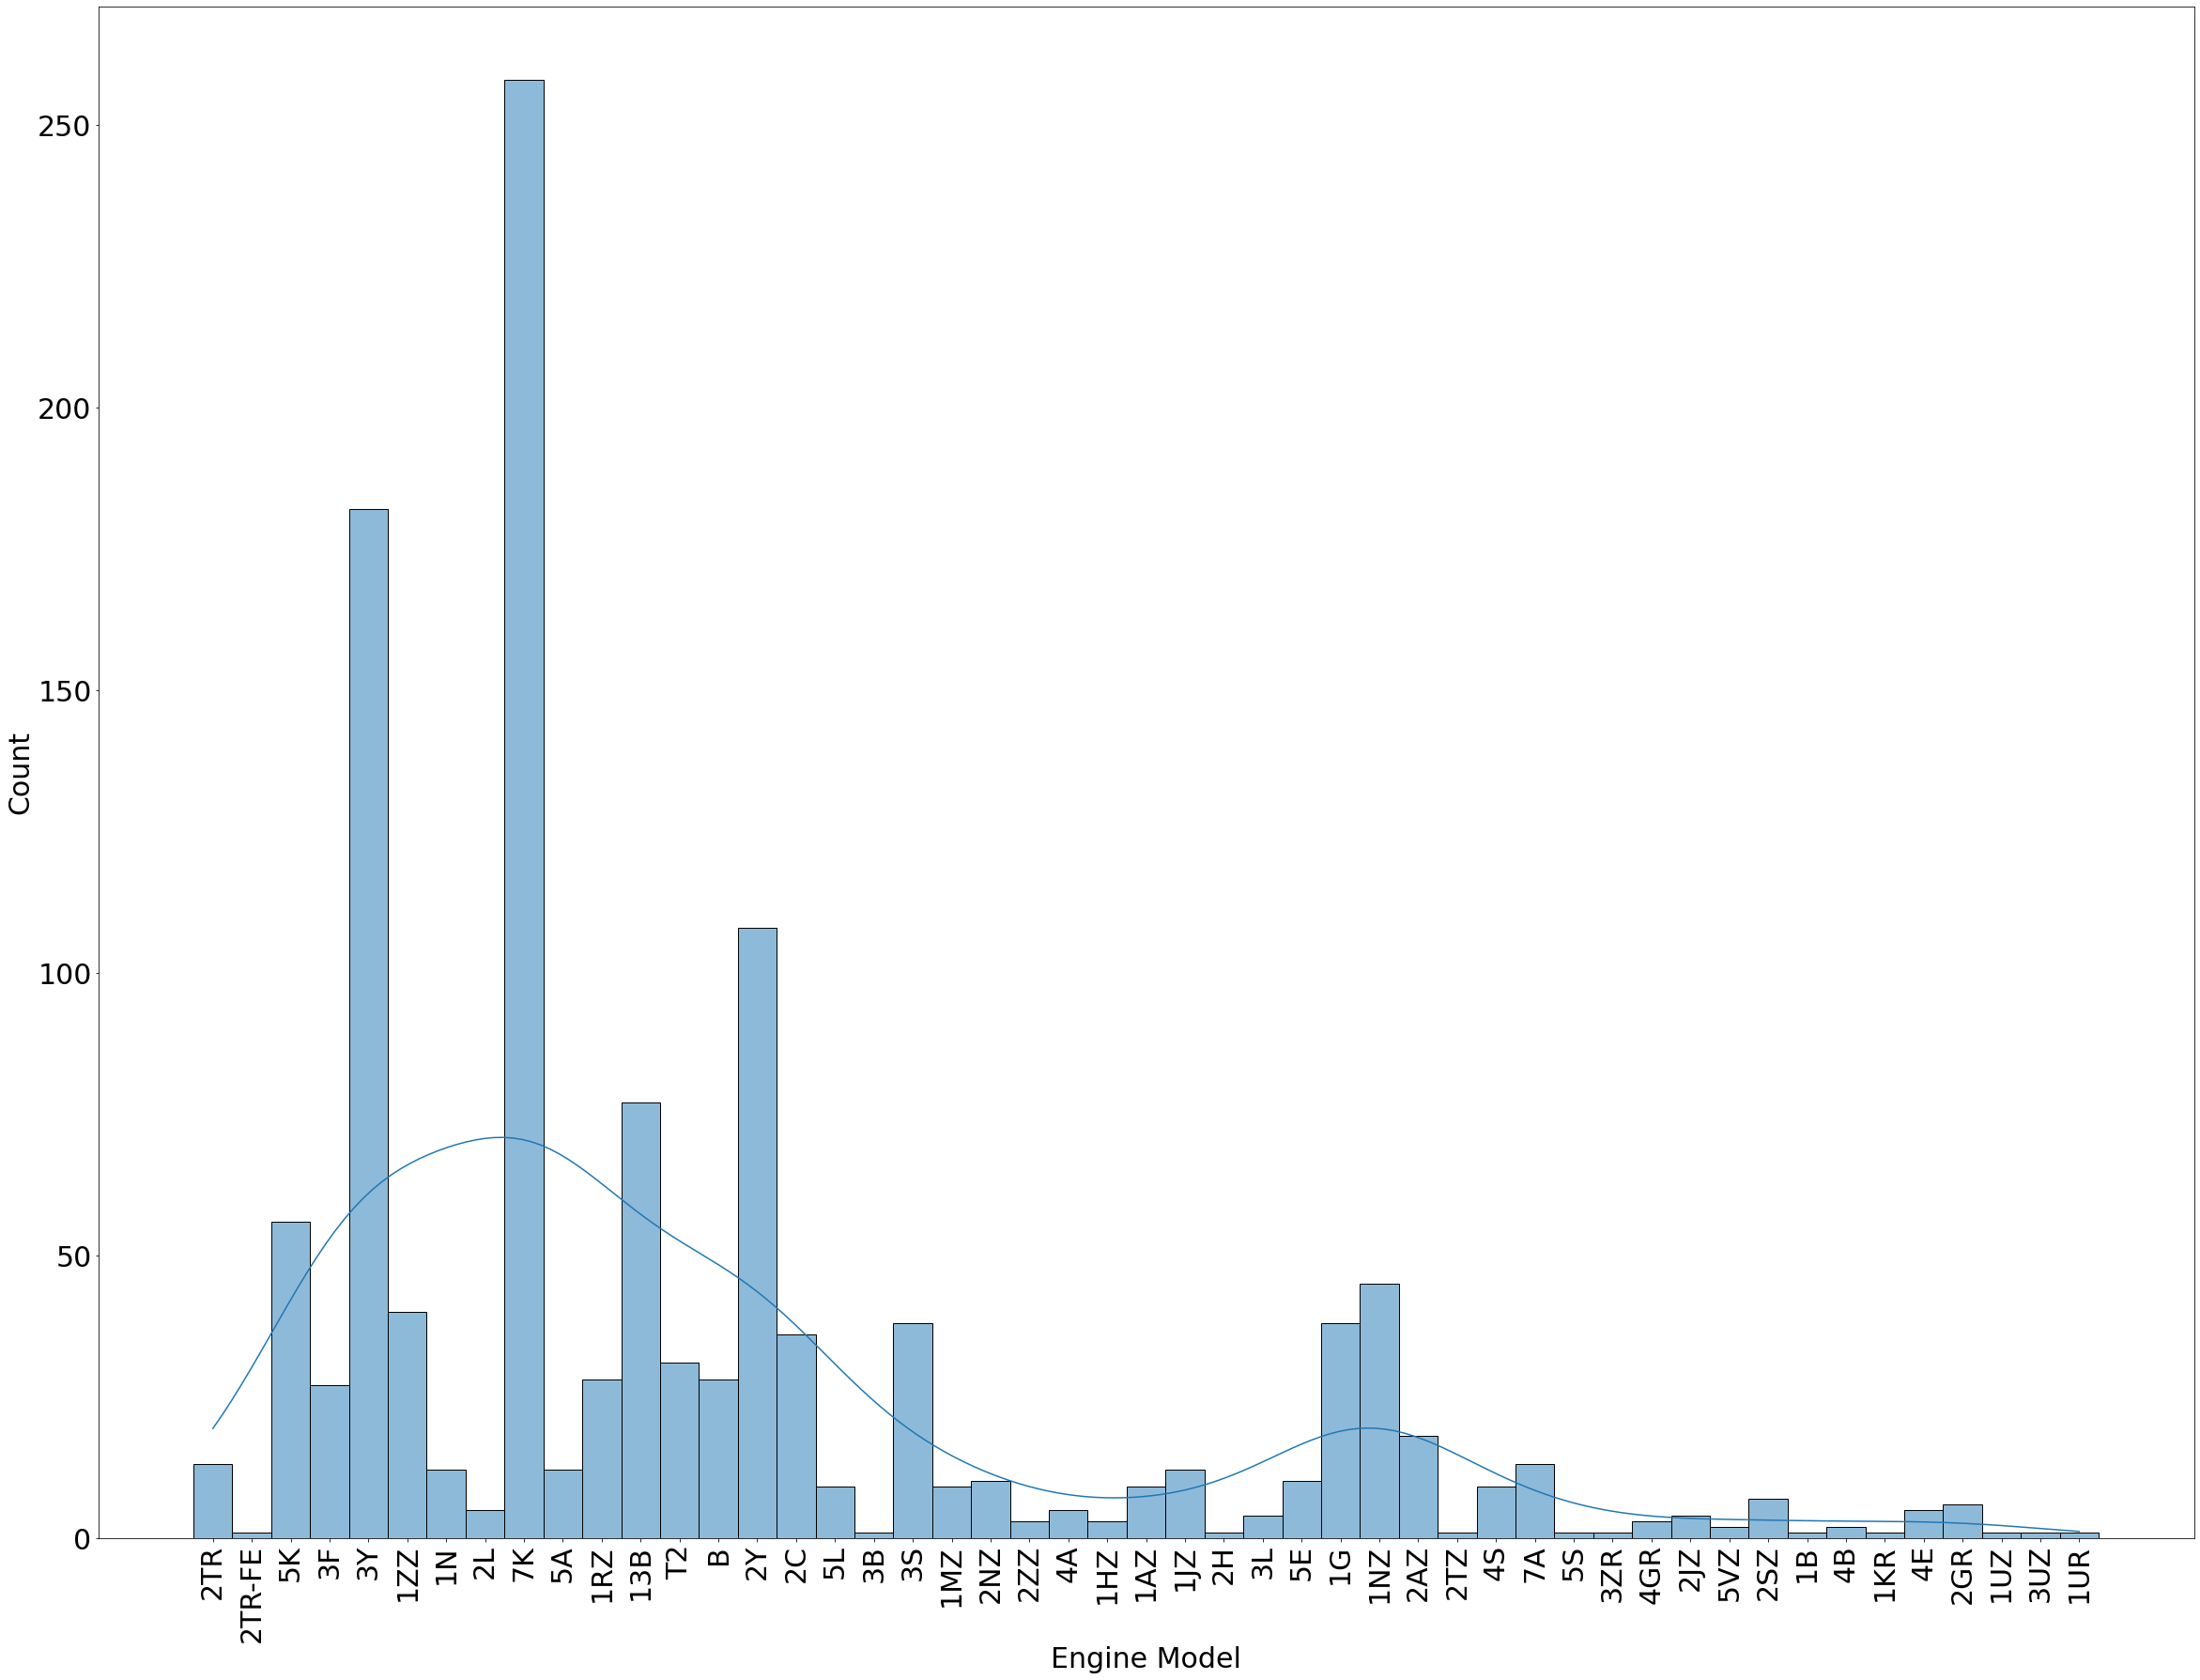

In [313]:
# plt.figure(figsize=(40,30))
# plt.xticks(fontsize = 30,rotation=90)
# plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
# plt.yticks(fontsize = 30,rotation=90)
# plt.ylabel(ylabel = 'Count',fontsize = 30)
# sns.histplot(data=list_toyota_remove_tail,kde=True)

plt.figure(figsize=(40,30))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

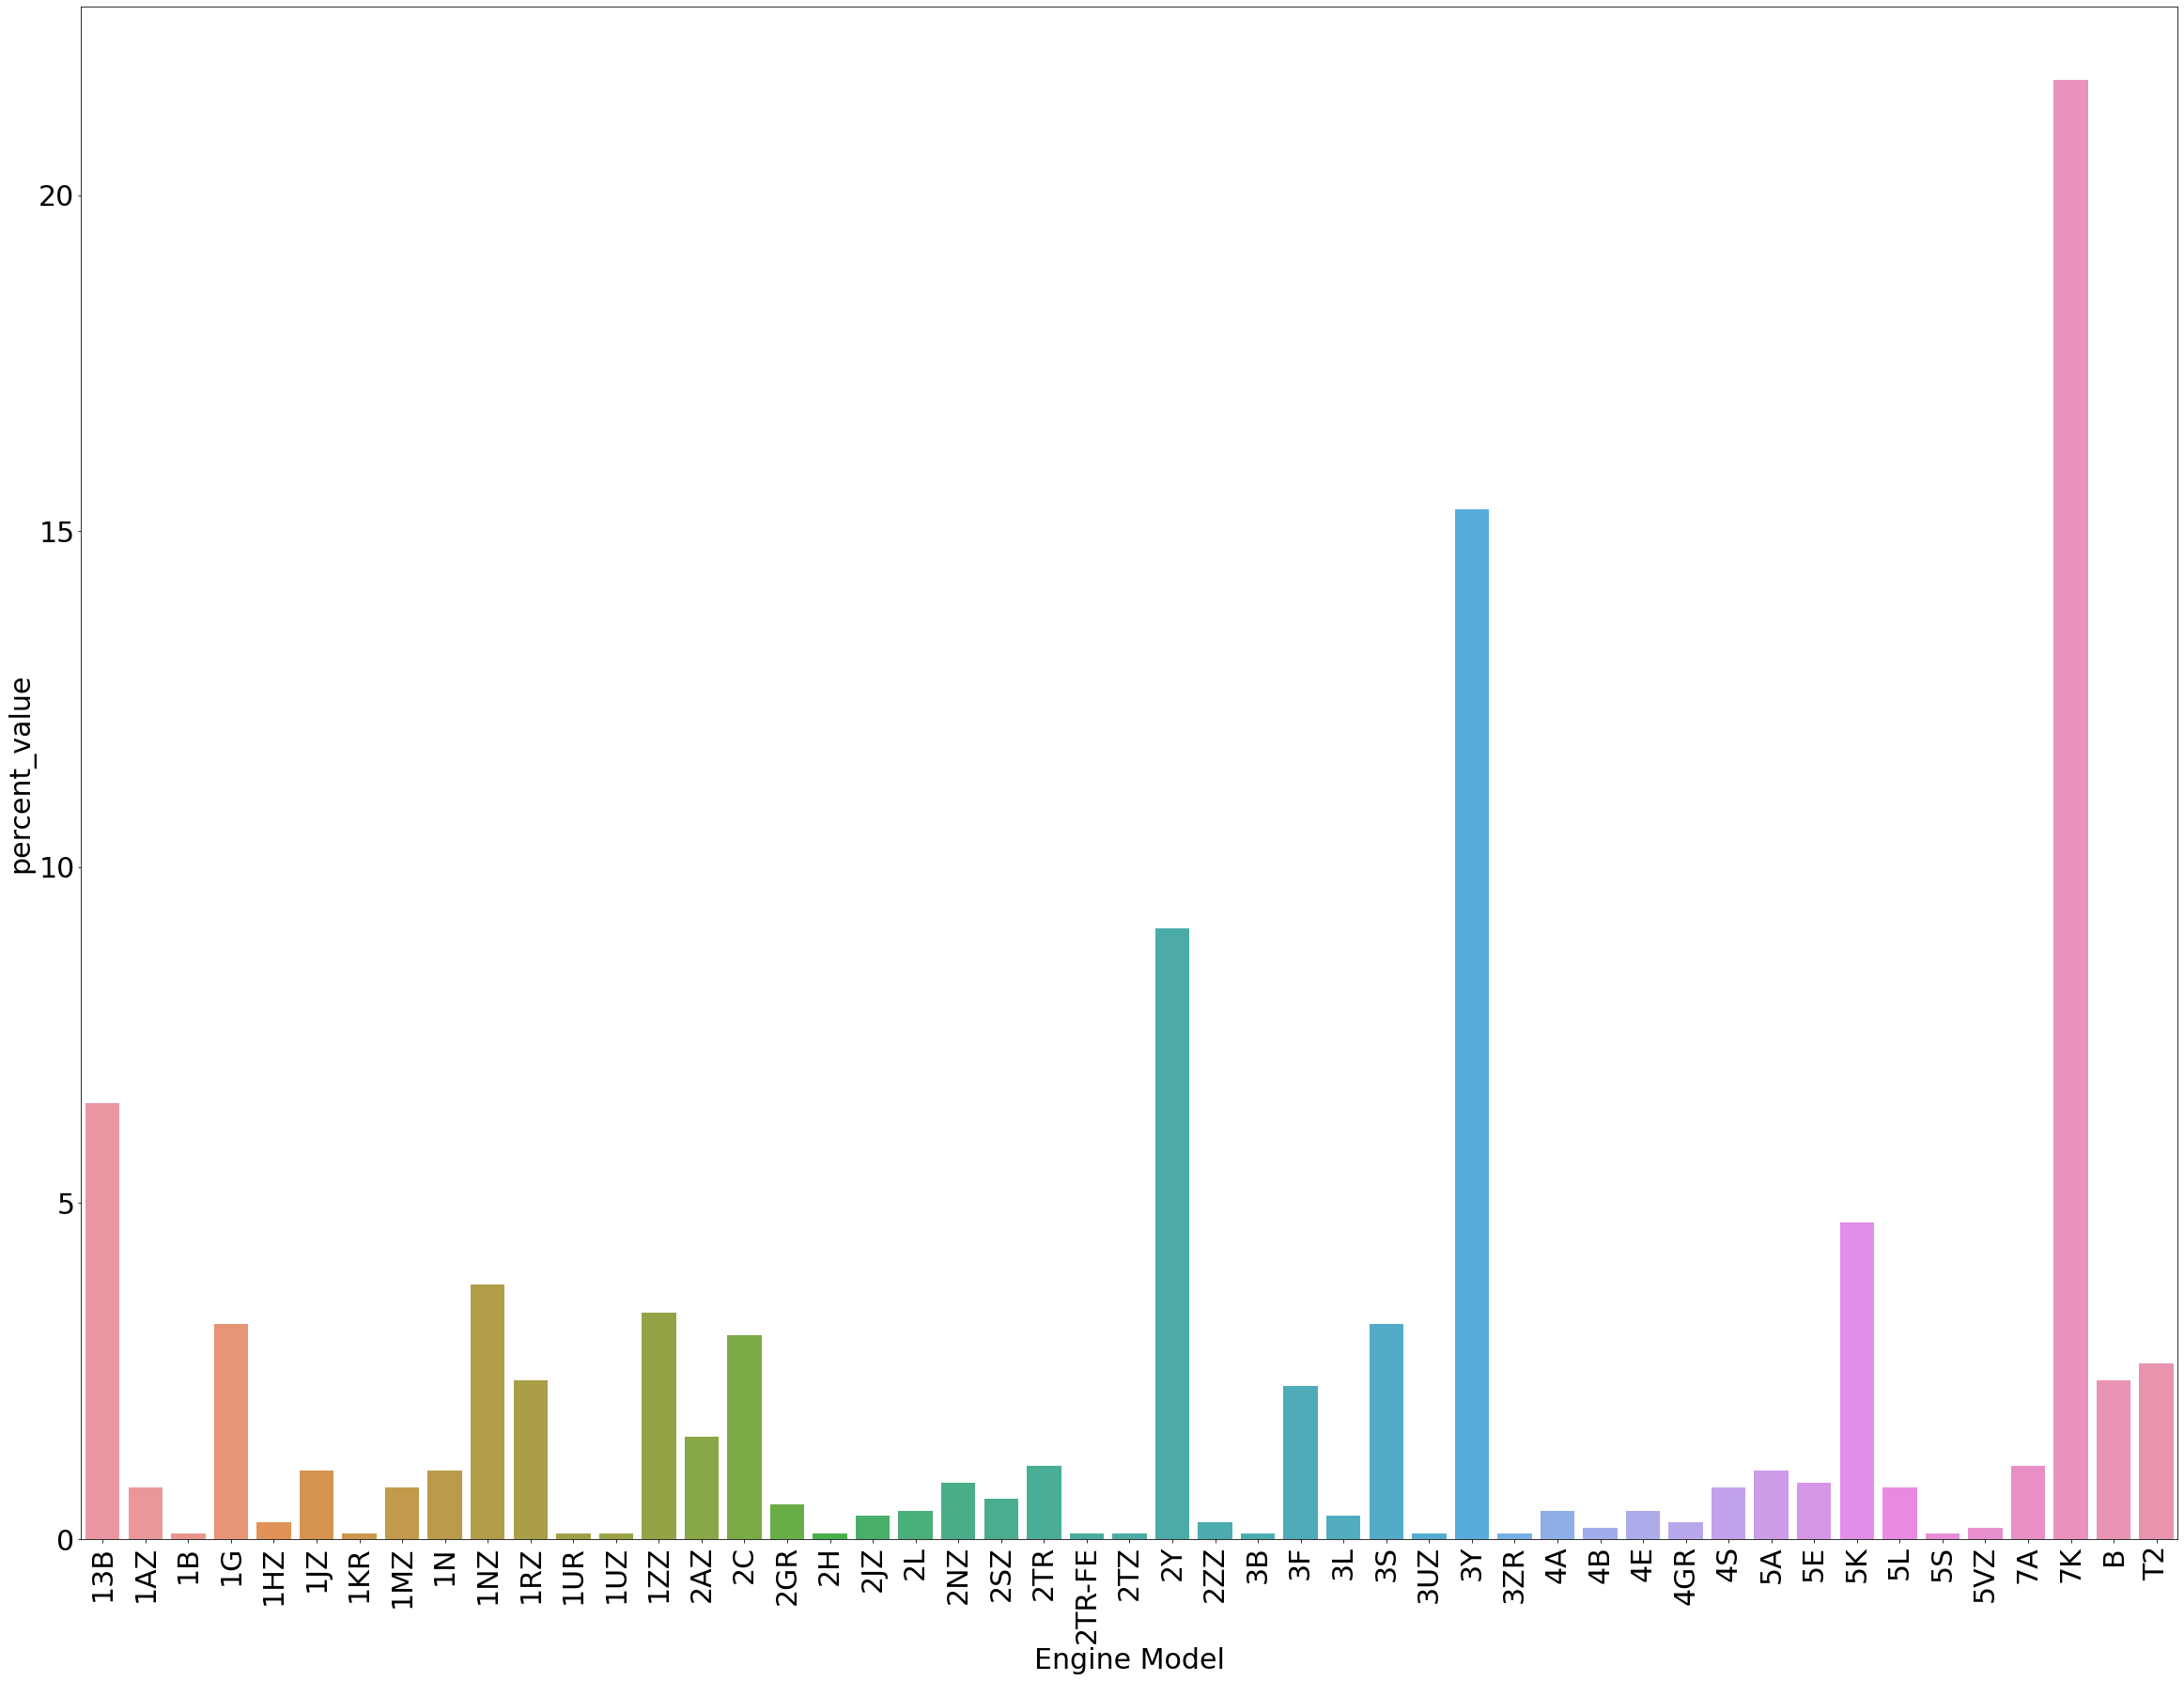

In [314]:
plt.figure(figsize=(40,30))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

<ipython-input-137-d95f13a9a8e9>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-137-d95f13a9a8e9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)


Text(0.5, 0, 'Engine Model')

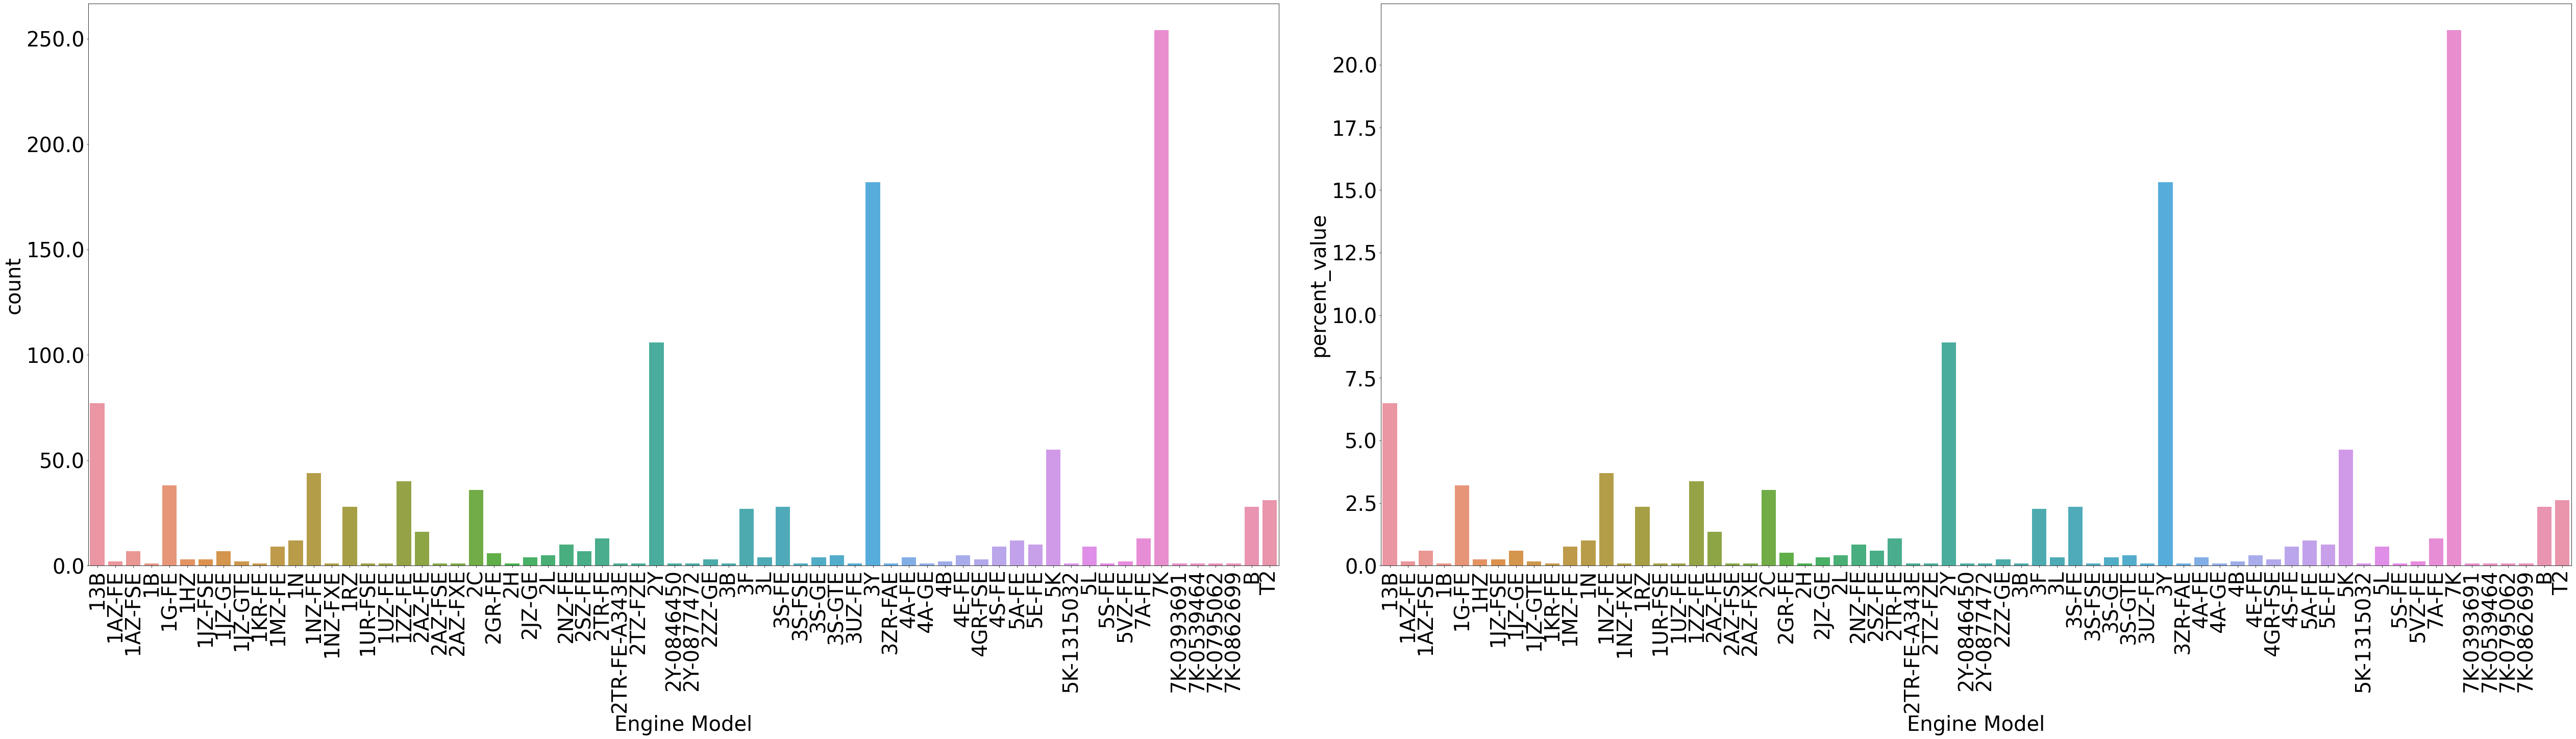

In [137]:
fig, axs = plt.subplots(1, 2, sharex=False, figsize=(70, 20),constrained_layout=True)
p = sns.barplot(x = 'Engine Model',y = 'count',data=df_freq_toyota,ax=axs[0])
q = sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota,ax=axs[1])
p.set_xticklabels(p.get_xticklabels(),size =40,rotation = 90)
q.set_xticklabels(q.get_xticklabels(),size =40,rotation = 90)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
p.set_ylabel("count",fontsize = 40)
q.set_ylabel("percent_value",fontsize = 40)
p.set_xlabel("Engine Model",fontsize = 40)
q.set_xlabel("Engine Model",fontsize = 40)

# Visualization Mazda

In [315]:
chain_list_em_mazda = list(chain(*list_all_engine_model_mazda_GTO))
len(chain_list_em_mazda)

2763

In [316]:
list_mazda_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_mazda))
list_mazda_remove_tail = list(map(lambda x :split_str(x) ,list_mazda_remove_tail))

In [317]:
df_list_mazda_remove_tail = pd.DataFrame({'Engine Model':list_mazda_remove_tail})
df_list_mazda_remove_tail

,Engine Model
0,FE
1,FE
2,FE
3,FE
4,G5
...,...
2758,FE
2759,F8
2760,GY
2761,B5


In [318]:
df_freq_mazda = df_list_mazda_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mazda ['percent_value']  = round(df_freq_mazda ['count']/df_freq_mazda ['count'].sum()*100,2)
df_freq_mazda

,Engine Model,count,percent_value
0,13B,77,2.79
1,B3E,6,0.22
2,B5,310,11.22
3,B6,60,2.17
4,BP,20,0.72
5,E5,7,0.25
6,F8,887,32.10
7,FE,549,19.87
8,FP,1,0.04
9,FS,1,0.04


<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

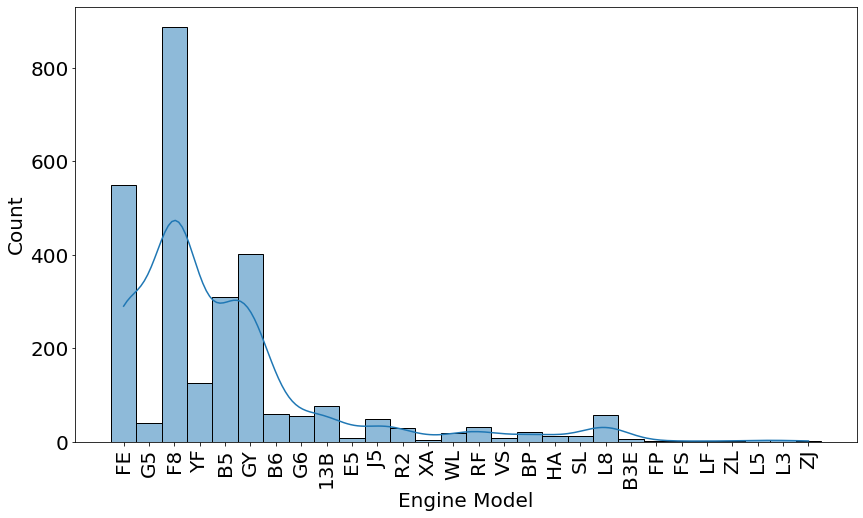

In [319]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.histplot(data=list_mazda_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

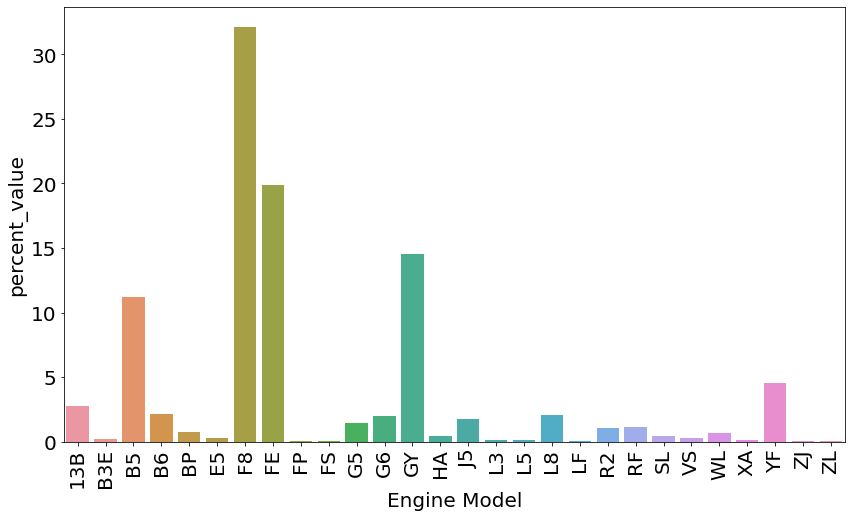

In [320]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mazda)

# Visualization Mitsubishi

In [322]:
chain_list_em_mitsubishi = list(chain(*list_all_engine_model_mitsubishi_GTO))
len(chain_list_em_mitsubishi)

13901

In [323]:
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_mitsubishi))
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,list_mitsubishi_remove_tail))
df_list_mitsubishi_remove_tail = pd.DataFrame({'Engine Model':list_mitsubishi_remove_tail})
df_list_mitsubishi_remove_tail

,Engine Model
0,4G93
1,6G73
2,6G73
3,4G93
4,4G93
...,...
13896,4G93
13897,4G63
13898,4G93
13899,6G73


In [324]:
df_freq_mitsubishi = df_list_mitsubishi_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

,Engine Model,count,percent_value
0,3A90,2,0.01
1,3G83,39,0.28
2,4A30,92,0.66
3,4A31,217,1.56
4,4A90,160,1.15
5,4A91,381,2.74
6,4B10,84,0.60
7,4B11,282,2.03
8,4B12,402,2.89
9,4D32,2,0.01


<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

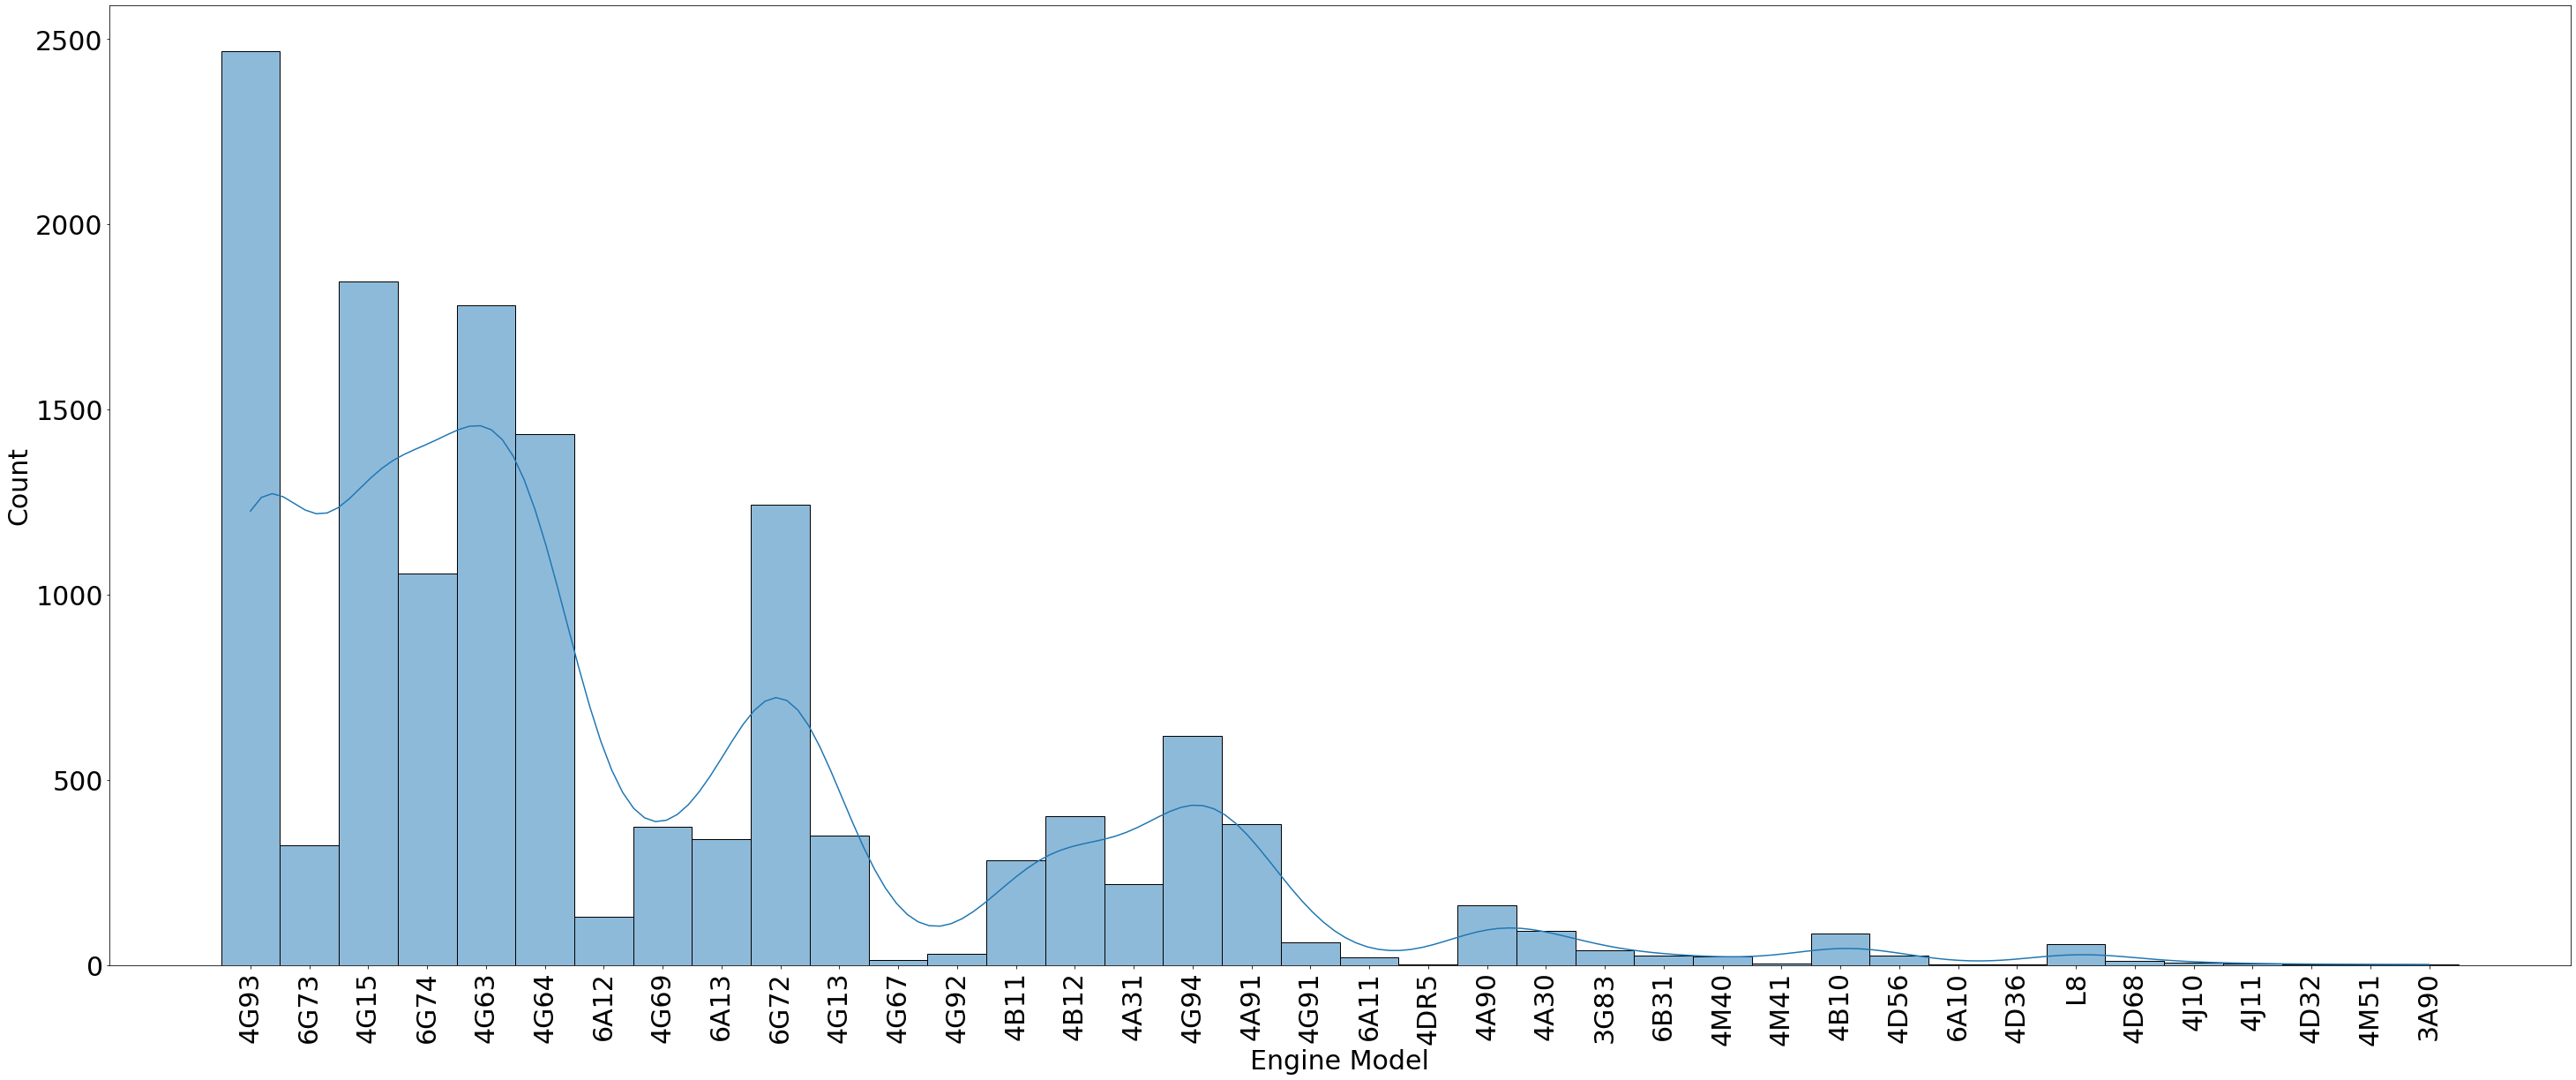

In [325]:
plt.figure(figsize=(50,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_mitsubishi_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

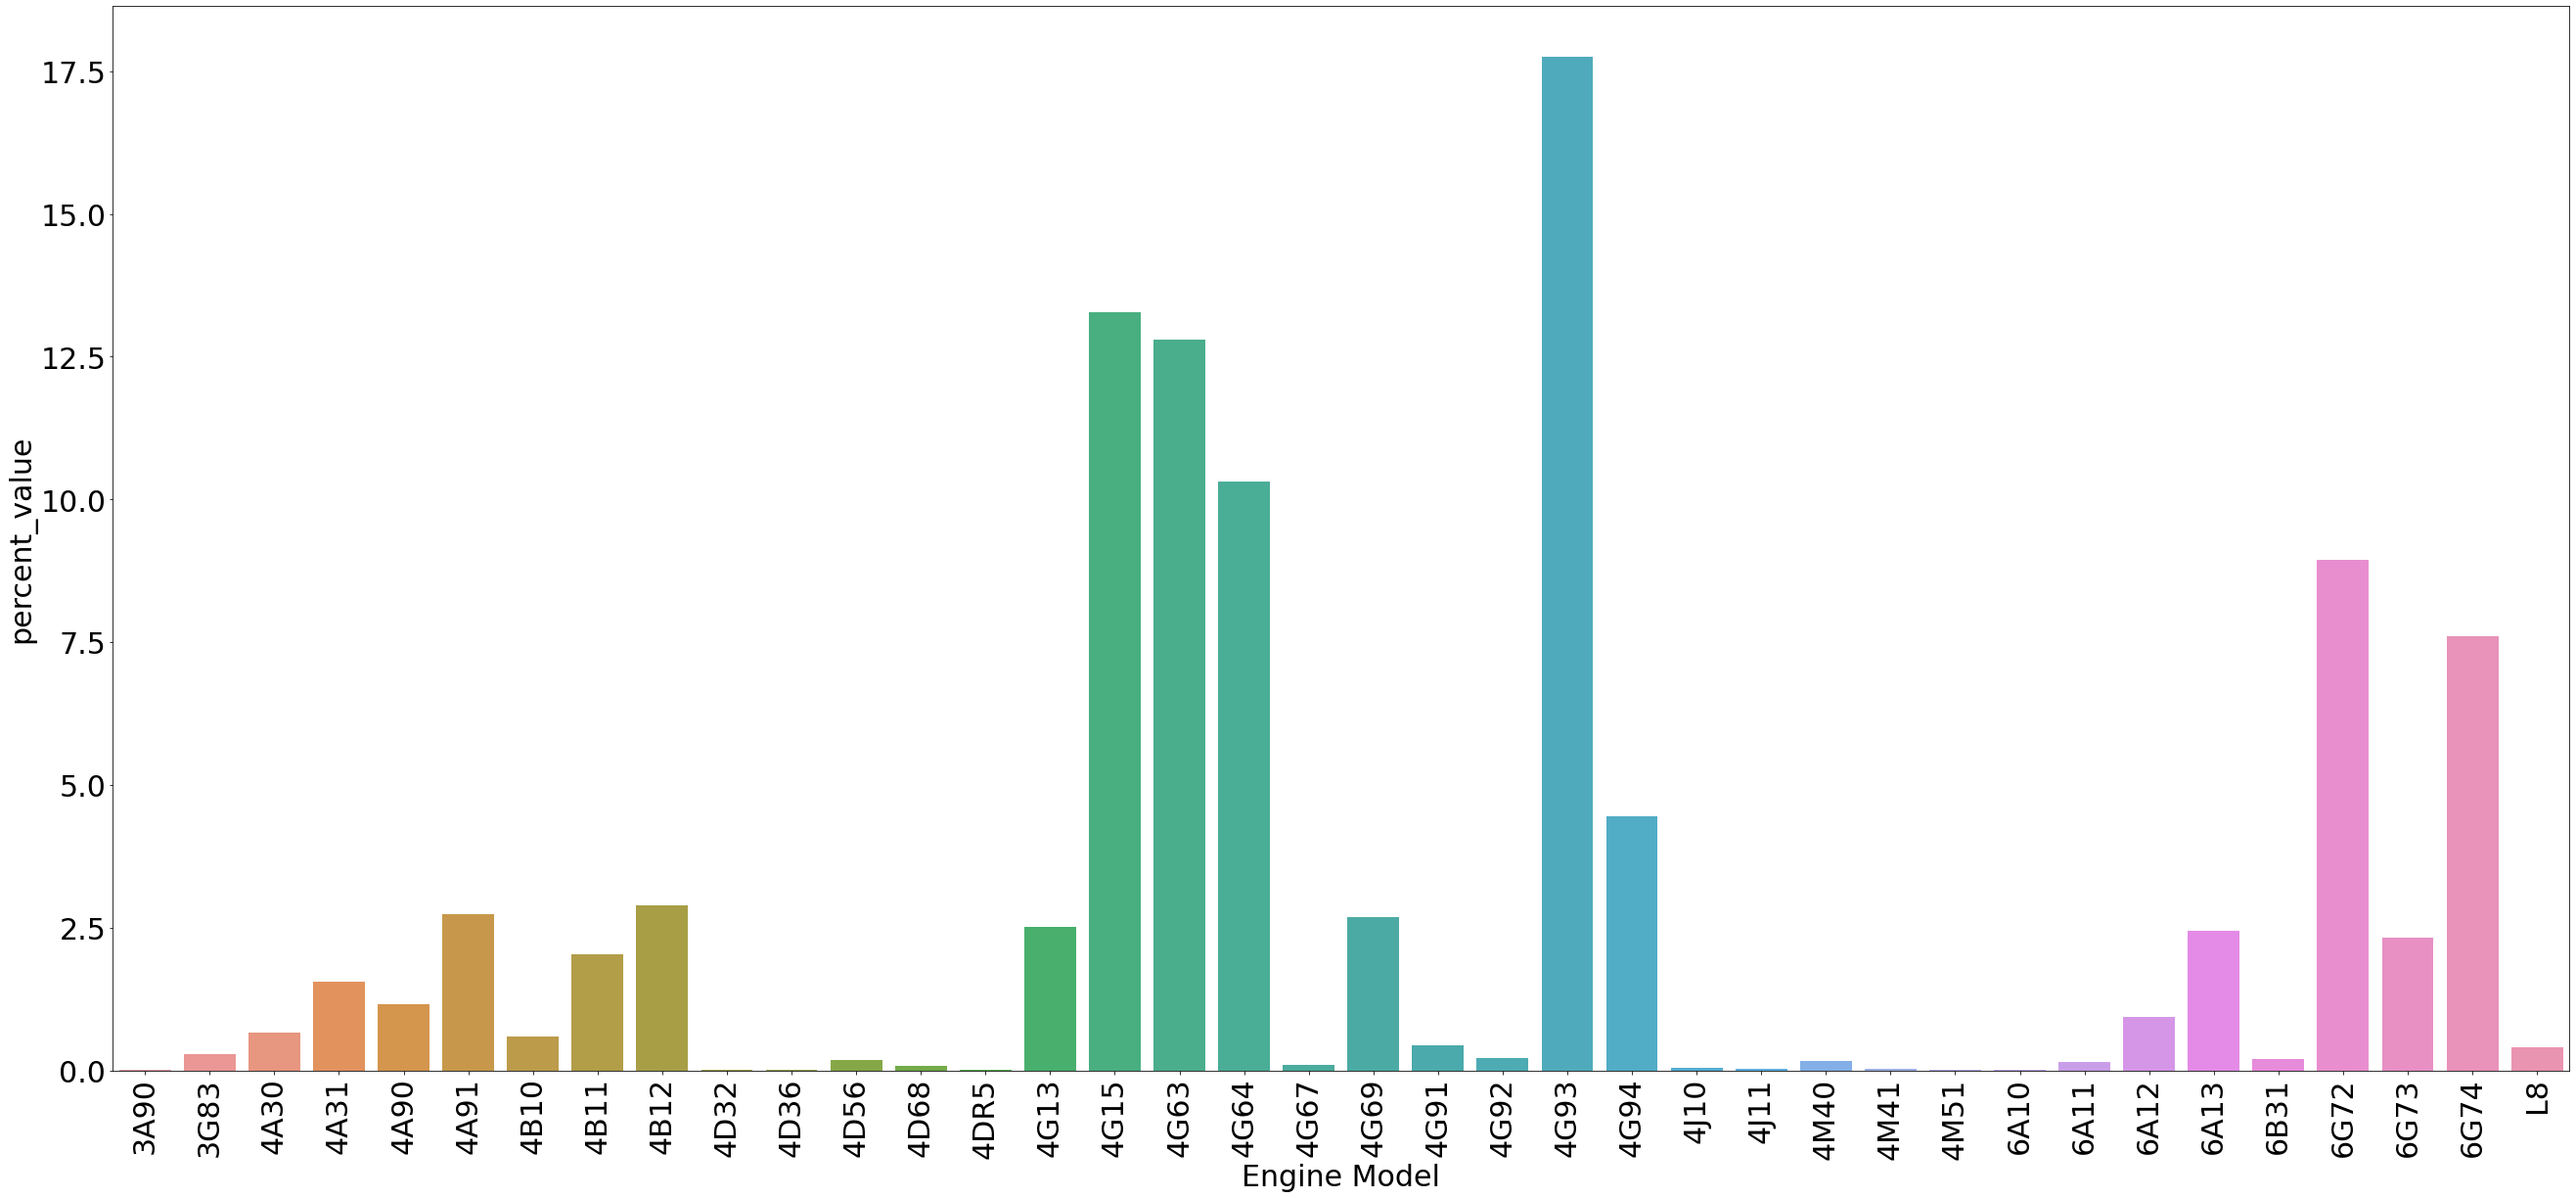

In [326]:
plt.figure(figsize=(45,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

# Visualization Honda

In [284]:
chain_list_em_honda = list(chain(*list_all_engine_model_honda_GTO))
len(chain_list_em_honda)

28795

In [285]:
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_honda))
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,list_mitsubishi_remove_tail))
df_list_mitsubishi_remove_tail = pd.DataFrame({'Engine Model':list_mitsubishi_remove_tail})
df_list_mitsubishi_remove_tail

,Engine Model
0,J30A
1,F23A
2,K20A
3,B20B
4,ZC
...,...
28790,D16A
28791,D15B
28792,D15B
28793,D15B


In [286]:
df_freq_mitsubishi = df_list_mitsubishi_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

,Engine Model,count,percent_value
0,A18A,3,0.01
1,A20A,1,0.00
2,B16A,32,0.11
3,B16B,10,0.03
4,B18B,75,0.26
5,B18C,19,0.07
6,B20B,4856,16.86
7,C32A,22,0.08
8,C35A,48,0.17
9,D13B,763,2.65


<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

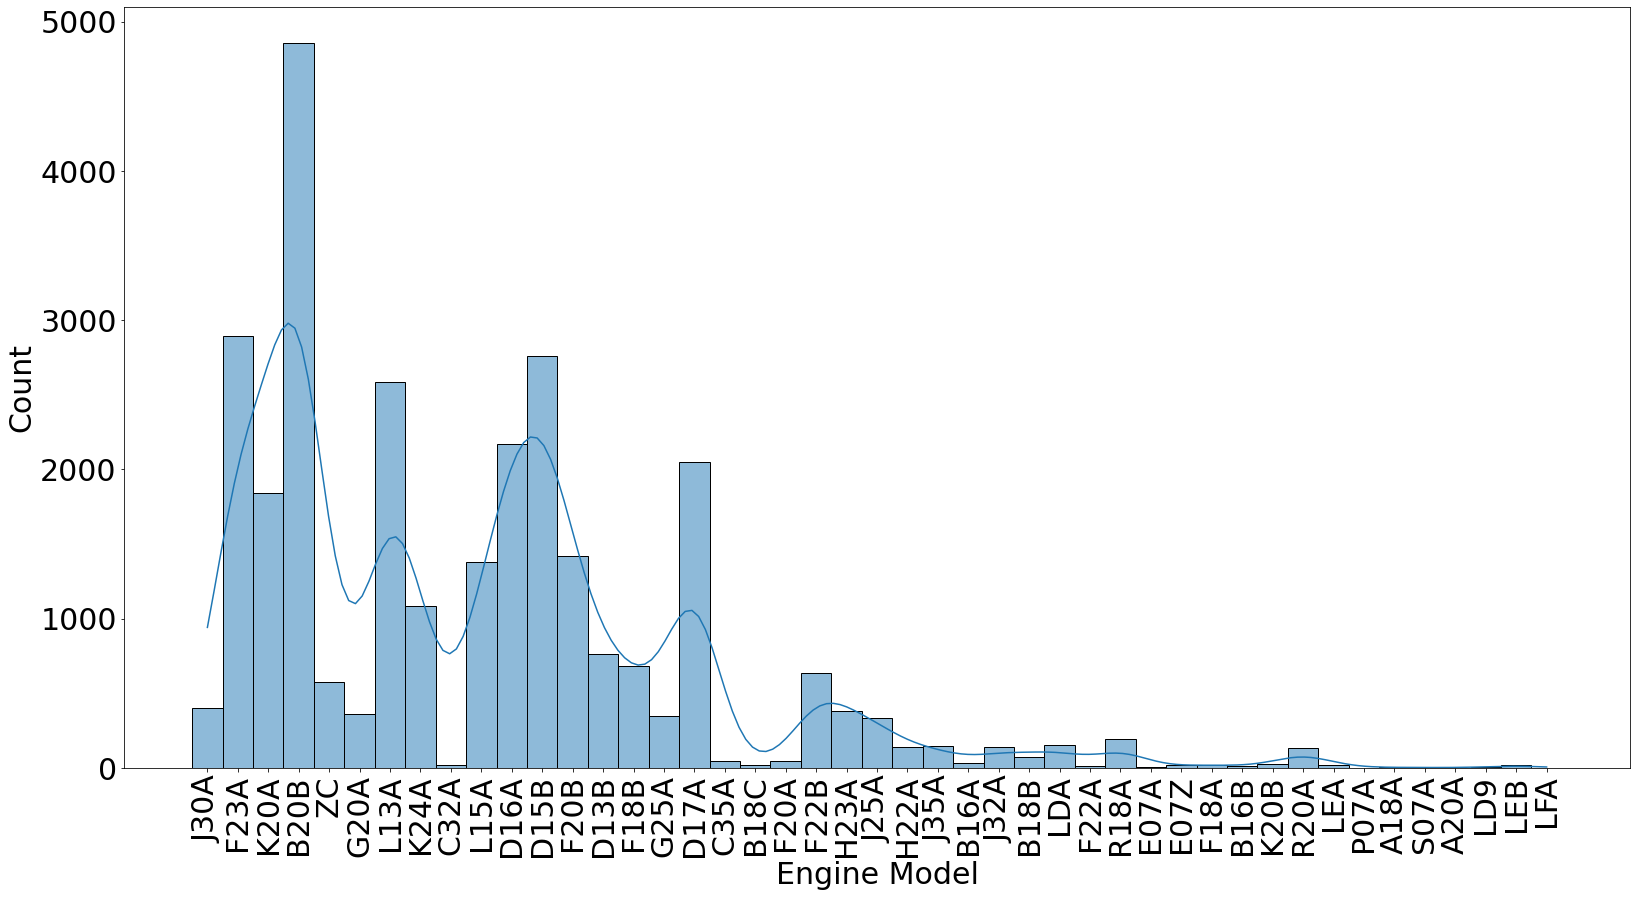

In [292]:
plt.figure(figsize=(27,14))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_mitsubishi_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

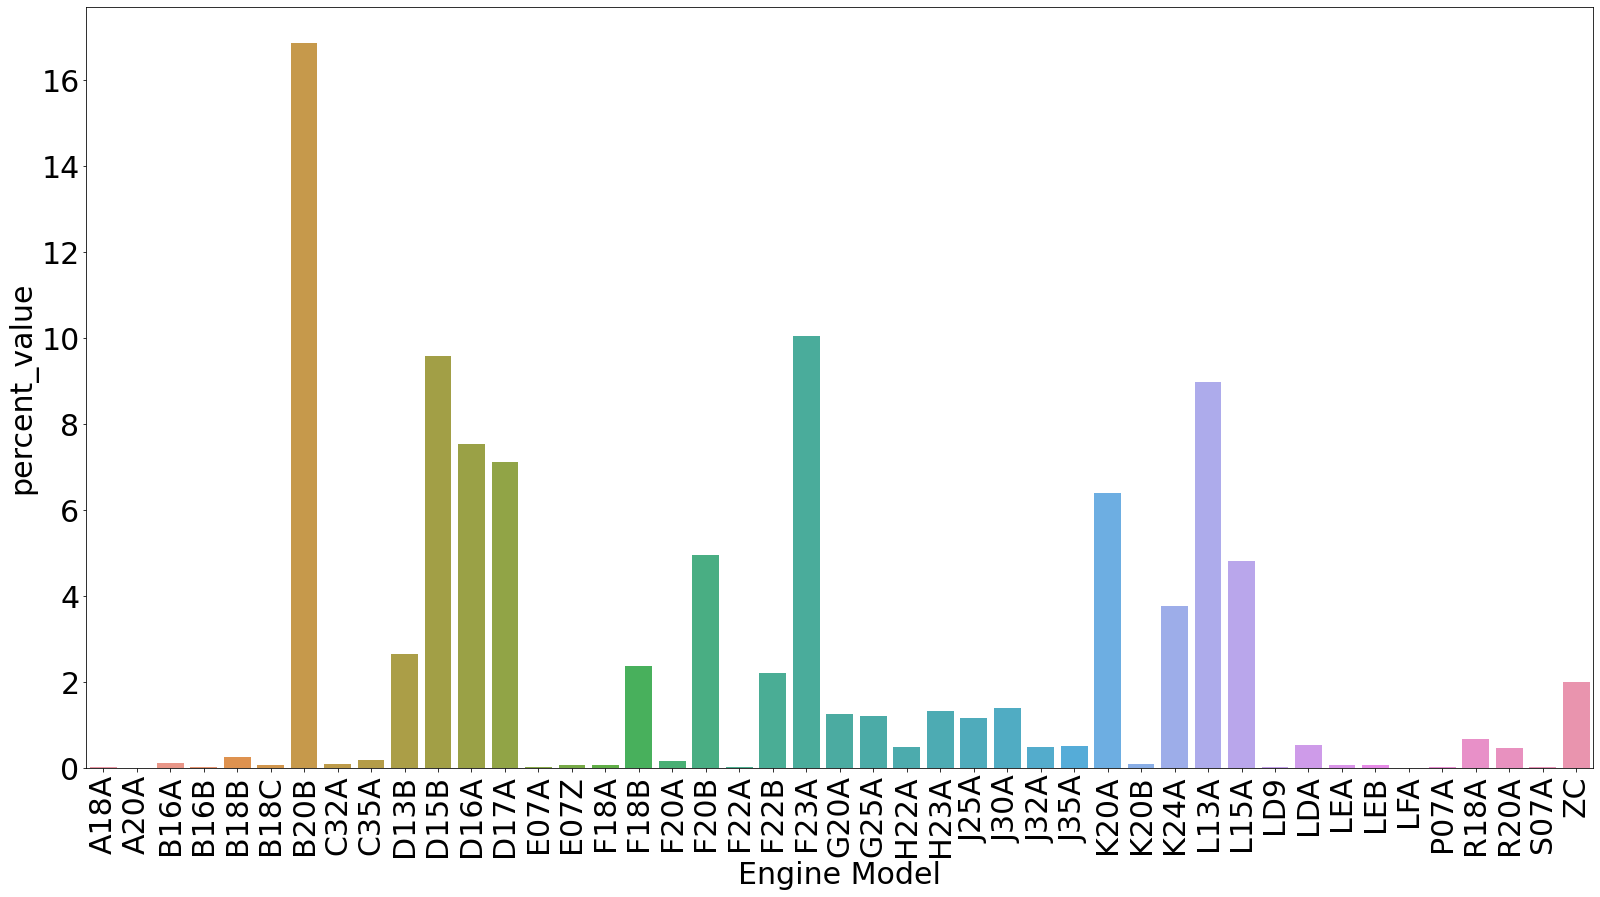

In [293]:
plt.figure(figsize=(27,14))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

# Visualization Nissan

In [271]:
chain_list_em_honda = list(chain(*list_all_engine_model_nissan_GTO))
len(chain_list_em_honda)

1393

In [272]:
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_honda))
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,list_mitsubishi_remove_tail))
df_list_mitsubishi_remove_tail = pd.DataFrame({'Engine Model':list_mitsubishi_remove_tail})
df_list_mitsubishi_remove_tail

,Engine Model
0,RB20
1,Z16
2,TD27
3,RB20
4,Z16
...,...
1388,VQ20DE
1389,QG15DE
1390,QG15DE
1391,QG15DE


In [273]:
df_freq_mitsubishi = df_list_mitsubishi_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

,Engine Model,count,percent_value
0,A14,2,0.14
1,A15,49,3.52
2,BD30,1,0.07
3,CD17,2,0.14
4,CD20,27,1.94
...,...,...,...
64,Z16,36,2.58
65,Z18,10,0.72
66,Z20,39,2.80
67,Z22,20,1.44


<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

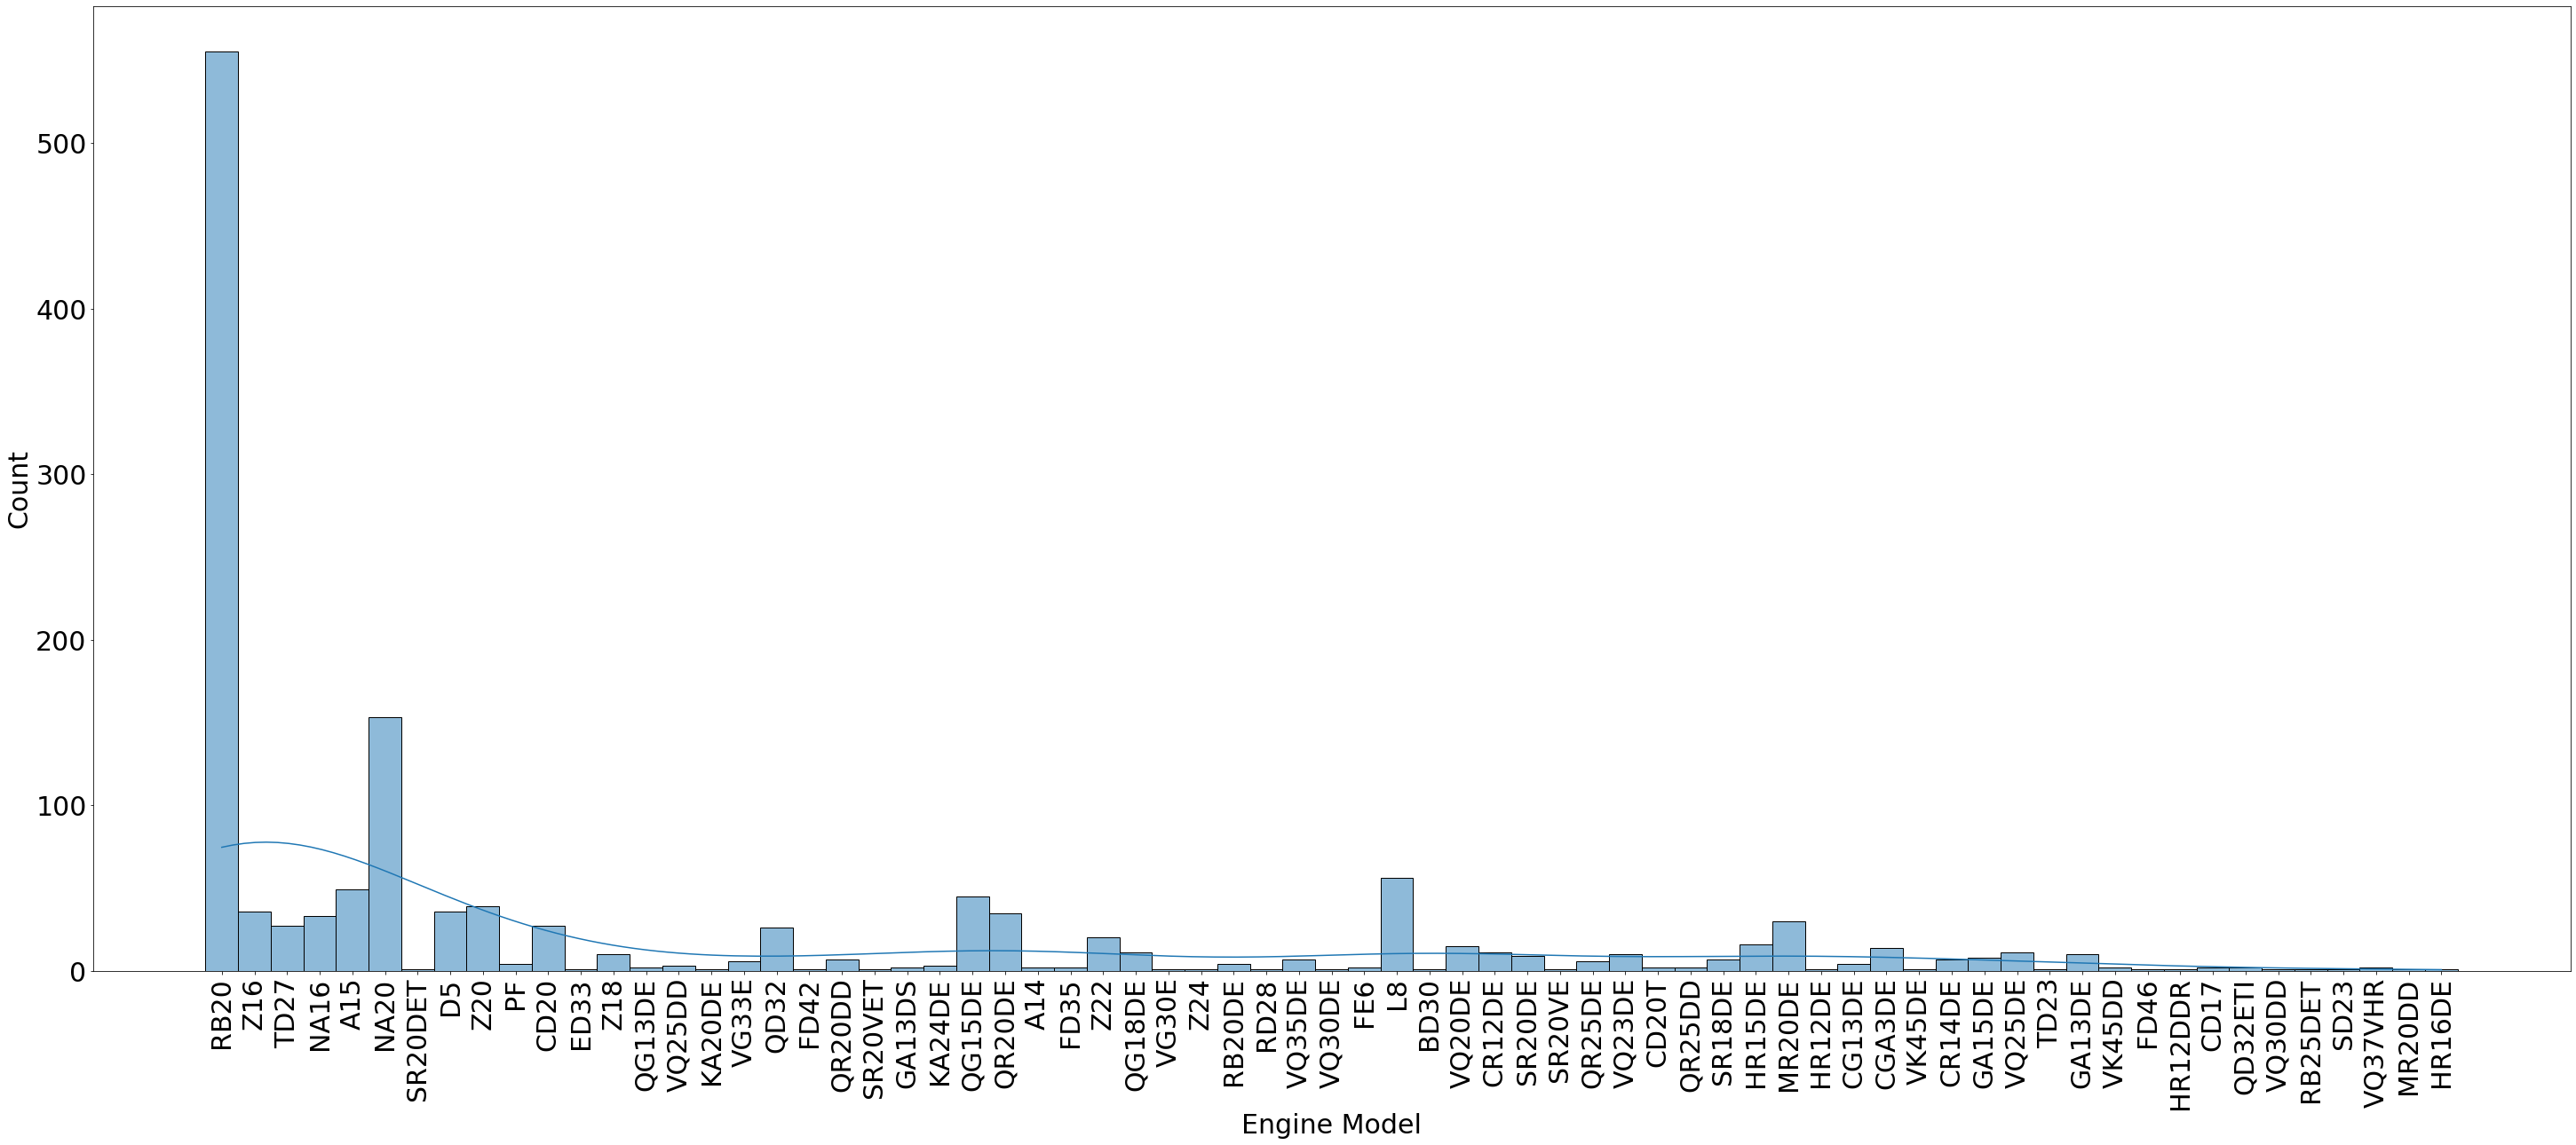

In [274]:
plt.figure(figsize=(50,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_mitsubishi_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

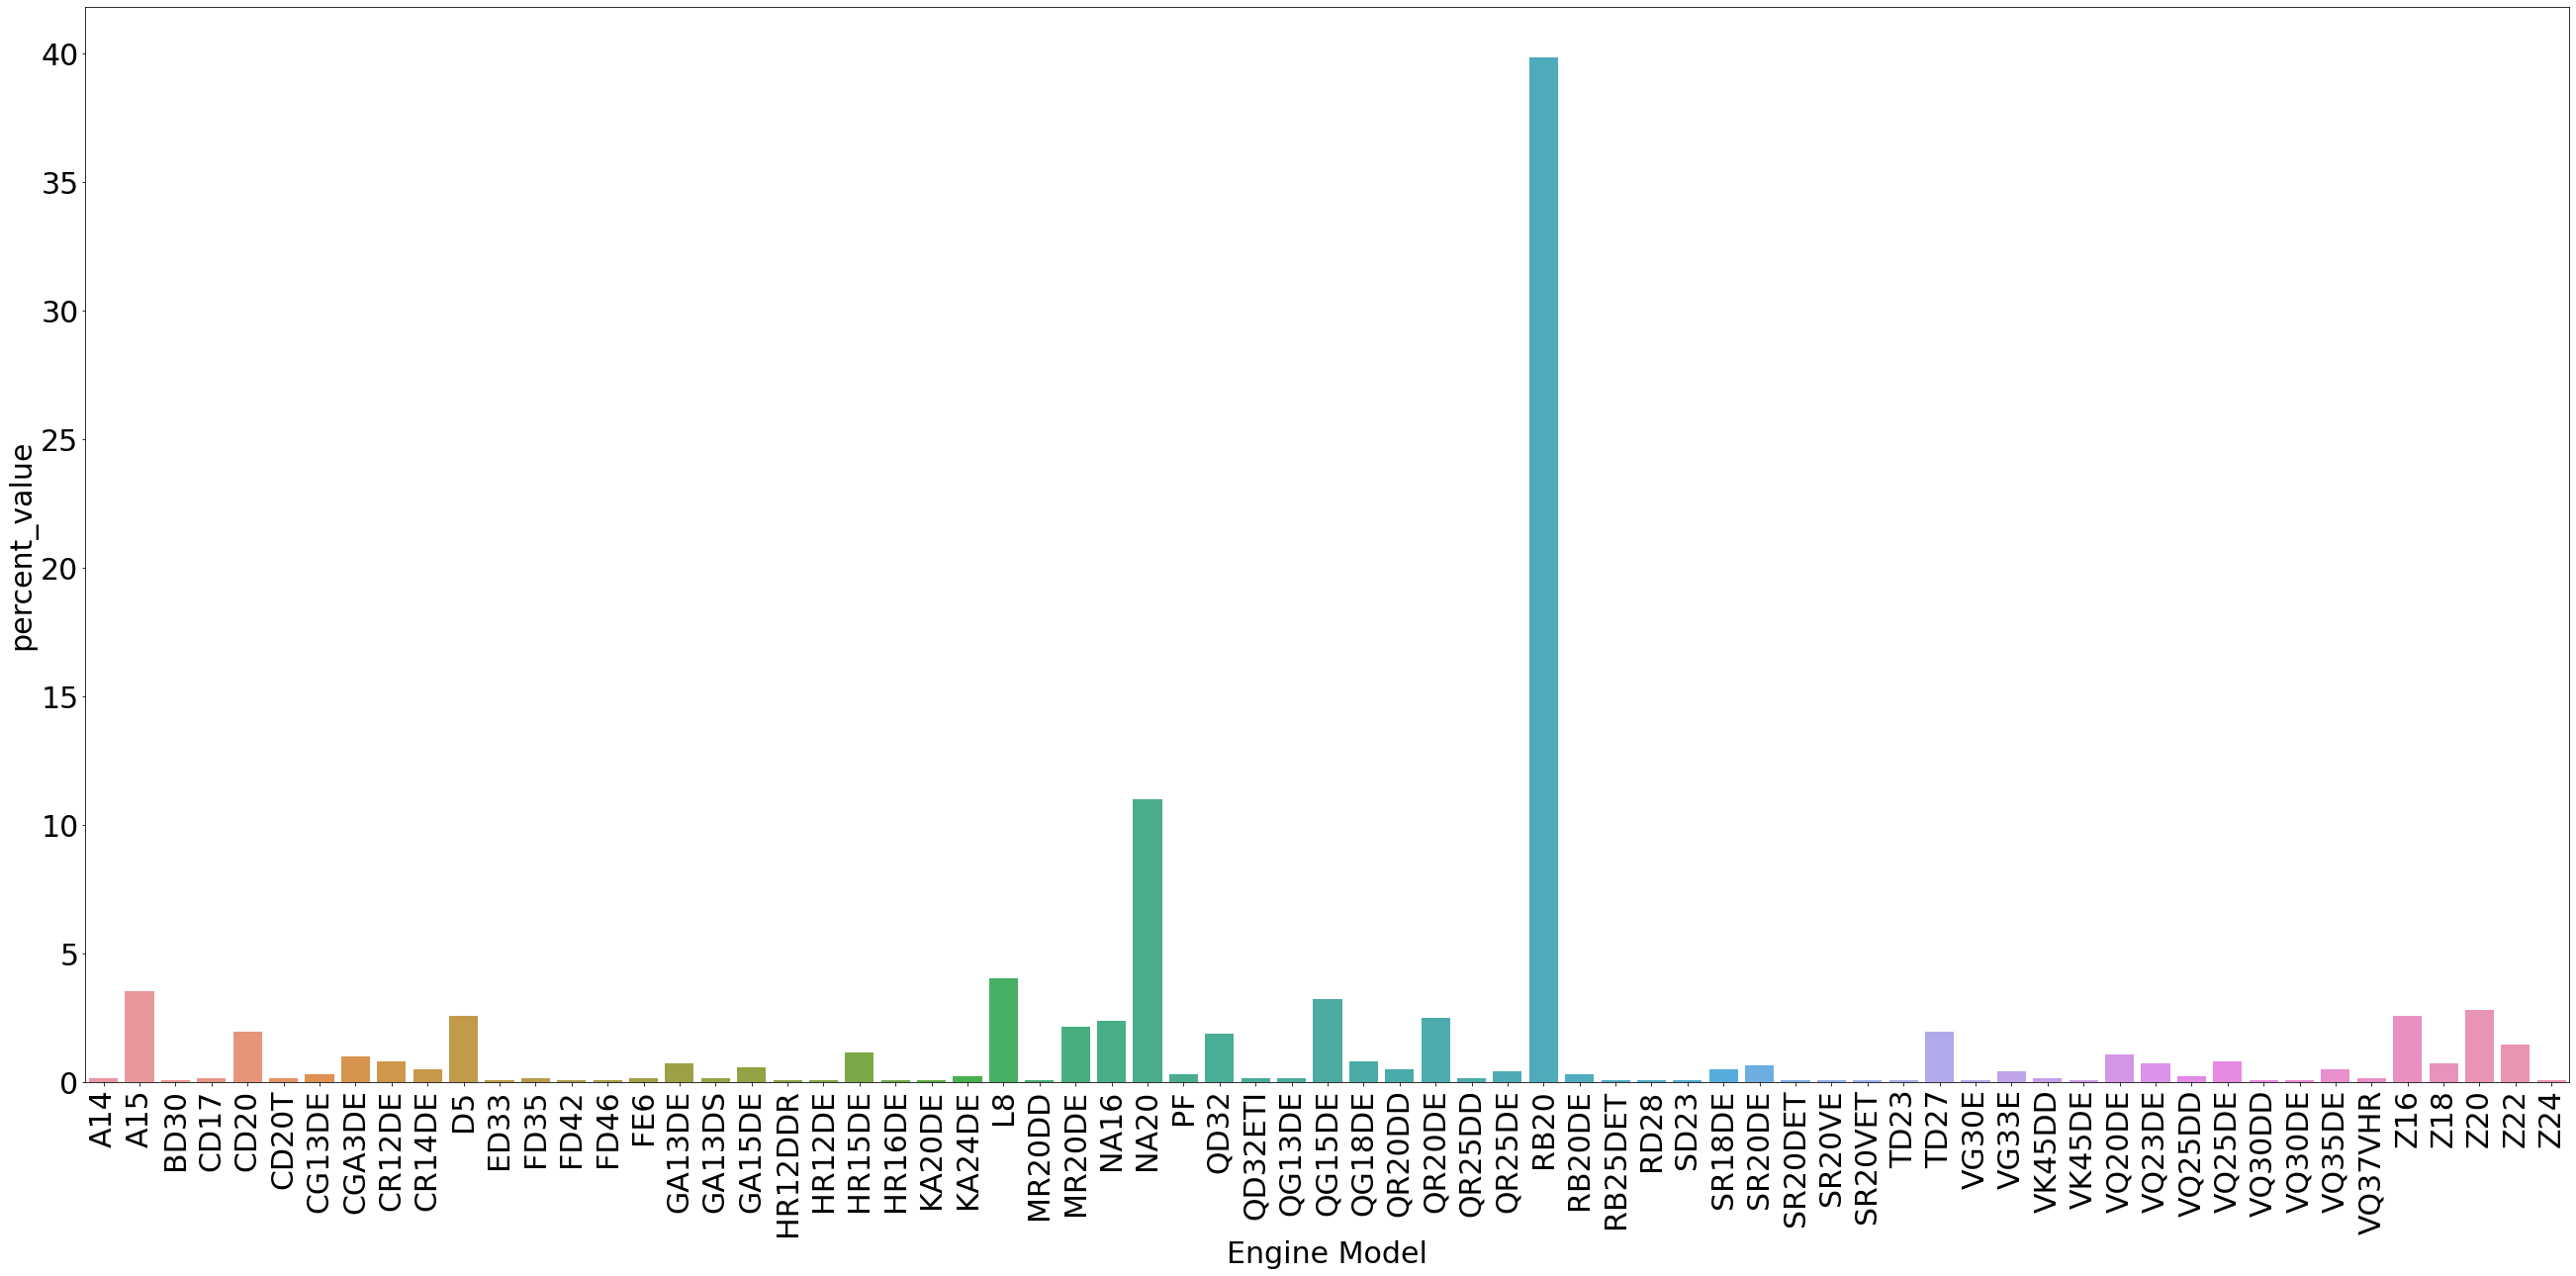

In [275]:
plt.figure(figsize=(45,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

# Visualization Nissan

In [276]:
chain_list_em_honda = list(chain(*list_all_engine_model_subaru_GTO))
len(chain_list_em_honda)

11486

In [277]:
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_honda))
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,list_mitsubishi_remove_tail))
df_list_mitsubishi_remove_tail = pd.DataFrame({'Engine Model':list_mitsubishi_remove_tail})
df_list_mitsubishi_remove_tail

,Engine Model
0,EJ20
1,EJ20
2,EJ25
3,EJ20
4,EJ20
...,...
11481,FB20
11482,EJ20
11483,EJ20
11484,FB20


In [278]:
df_freq_mitsubishi = df_list_mitsubishi_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

,Engine Model,count,percent_value
0,EJ15,959,8.35
1,EJ18,171,1.49
2,EJ20,7835,68.21
3,EJ22,10,0.09
4,EJ25,1396,12.15
5,EL15,378,3.29
6,EN07,27,0.24
7,EZ30,509,4.43
8,FB16,44,0.38
9,FB20,131,1.14


<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

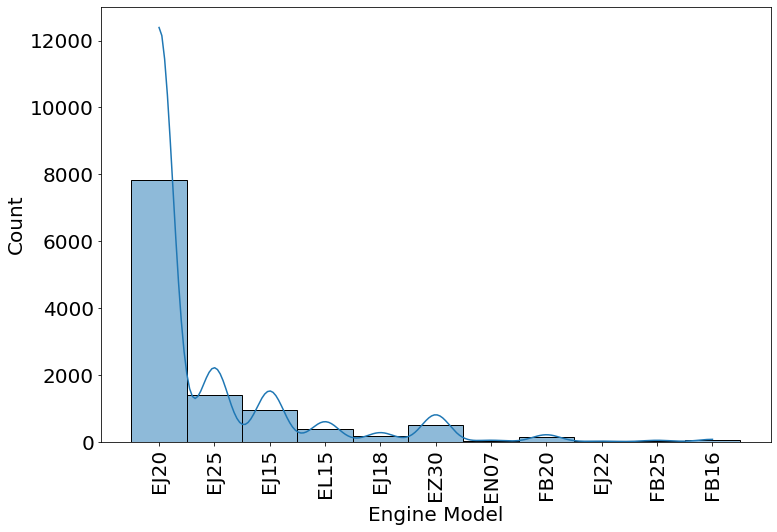

In [282]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.histplot(data=list_mitsubishi_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

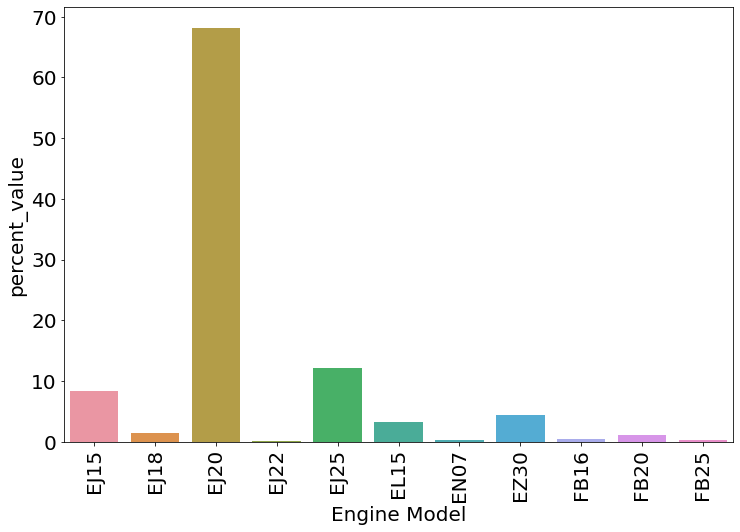

In [283]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

In [294]:
df_GTO_Japan  = pd.read_csv('C:\\Users\\Admin\\Github\\Kaiho\\GTO_JAPAN_engine.csv')

D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [296]:
df_GTO_Japan

,Register Date,HS Code,Product Description,Producer,Brand,Place of Receipt,Country of Origin,Country of Sales,Shipper,Shipper Address,...,Unit of Measure,Incoterms,Gross Weight in KG,Net Weight in KG,Cargo Value USD,nor_jp_country,group_hs_code,year,nor_shipper,merge_brand
0,2018-01-01,8407343009,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,SUZUKI,SUZUKI,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",EARLYBIRD CO.LTD,"JAPAN, TOYAMA-SHI, IWASE, SUWAMACHI 52",...,NaN,CFR,200.0,200.0,302.00,Japan,840734,2018,Other,SUZUKI
1,2018-01-01,8407349908,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,MAZDA MOTOR CORPORATION,MAZDA,ПОХАНГ,"JP, JPN, Japan","JP, JPN, Japan",PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...,", SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...",...,NaN,FOB,107979.8,66410.0,539455.71,Japan,840734,2018,Other,MAZDA
2,2018-01-01,8407343009,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,"DAIHATSU,SUBARU,SUZUKI","DAIHATSU,SUBARU,SUZUKI",ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","ASTRADE CO.,LTD",", , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU",...,NaN,CFR,800.0,800.0,1200.00,Japan,840734,2018,Other,"DAIHATSU,SUBARU,SUZUKI"
3,2018-01-01,8407343009,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,TOYOTA MOTOR CORP.,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan",YAMAGIN CORPORATION,", JAPAN, TOKYO, DAIICHI SEIMEI BLDG,8F,2-19-3 ...",...,NaN,CFR,399.0,399.0,602.49,Japan,840734,2018,Other,TOYOTA
4,2018-01-01,8407343009,ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...,TOYOTA,TOYOTA,ВЛАДИВОСТОК,"JP, JPN, Japan","JP, JPN, Japan","ARAI CO., LTD","671-1132, HYOGO, HIMEJI CITY, KANBEI CHO OHTSU...",...,NaN,CFR,2540.0,2540.0,3835.40,Japan,840734,2018,Other,TOYOTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100539,2016-12-01,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...,HONDA MOTOR CO. LTD,HONDA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",SHIJO TRADING,SHIZUOKA 418-0022 2150-2 KOIZUMI FUJINOMIYA,...,NaN,CFR,1897.8,1897.8,2846.70,Japan,840734,2016,Other,HONDA
100540,2016-12-01,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...,HONDA MOTOR CORPORATION,HONDA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan","EAST-JAPAN RECYCLING RESOURCES CO.,LTD 21-1 SH...",NaN,...,NaN,CFR,900.0,900.0,1360.41,Japan,840734,2016,Other,HONDA
100541,2016-12-01,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...,SUBARU-FUJI HEAVY INDUSTRIES LTD,SUBARU,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan",SCP-TRANS LLC,KOBE 658-0032 5 KOYOCHO HIGASHI-NADA-KU RIC WE...,...,NaN,CFR,720.0,714.0,1071.00,Japan,840734,2016,Other,SUBARU
100542,2016-12-01,8407343009,ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...,HONDA MOTOR CO.,HONDA,ВОСТОЧНЫЙ,"JP, JPN, Japan","JP, JPN, Japan","KAIHO SANGYO CO.,LTD","KANAZAWA-SHI ISHIKAWA,920-0209 1-25 HIGASHIKAG...",...,NaN,CFR,900.0,900.0,1350.30,Japan,840734,2016,KAIHO,HONDA


In [297]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_GTO_Japan['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['2C-3633170'],
 ['1AZ-FSE-4899029', '1AZ-FSE-4295017'],
 ['1ZZ-FE-1193440', '5A-FE-G626241'],
 ['1AZ-FSE-4741684', '1KR-FE-0648081'],
 ['2AZ-FE-1296941', '2AZ-FSE-2074864'],
 ['1AZ-FSE-4557868'],
 ['3Y-0818563'],
 ['2C-3721260'],
 ['2C-3468281'],
 ['2C-2558135'],
 ['2C-0914707'],
 ['2C-0559787'],
 ['2C-3317877'],
 ['7K-0782504'],
 ['7K-042600'],
 ['2C-3261979'],
 ['2C-3403112'],
 ['2C-Б'],
 ['2C-2458964'],
 ['2C-1202994'],
 ['2C-0890568'],
 ['2C-3059151'],
 ['7K-G908723'],
 ['2C-2604478'],
 ['2C-3687899'],
 ['7K-0314150'],
 ['3Y-1080311'],
 ['7K-0586878'],
 ['3L-3081649'],
 ['7K-O7'],
 ['5K-0485772'],
 ['13B-410820'],
 ['2Y-0824062'],
 ['7K-0853135'],
 ['3F-0315702'],
 ['5K-13265'],
 ['7K-0803497'],
 ['7K-0865976'],
 ['2Y-O861964'],
 ['3Y-1184787'],
 ['7K-0098754'],
 ['3Y-1232260', '3Y-1256560'],
 ['3Y-1147221'],
 ['3Y-1232260', '3Y-1256560'],
 ['7K-0864092'],
 ['7K-0389805'],
 ['3S-GE-9358224'],
 ['3Y-1302118'],
 ['1RZ-2754684'],
 ['7K-0819205', '7K-0853589', '7K-0853116'],
 ['T2-00